In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import ast
from collections import Counter

In [2]:
data = pd.read_csv('data/cbg_patterns.csv')

# 表格基本属性

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
census_block_group          220734 non-null float64
date_range_start            220735 non-null int64
date_range_end              220735 non-null int64
raw_visit_count             220629 non-null float64
raw_visitor_count           220629 non-null float64
visitor_home_cbgs           220735 non-null object
visitor_work_cbgs           220735 non-null object
distance_from_home          220518 non-null float64
related_same_day_brand      220735 non-null object
related_same_month_brand    220735 non-null object
top_brands                  220735 non-null object
popularity_by_hour          220735 non-null object
popularity_by_day           220735 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 21.9+ MB


# 2.显示前五项记录进行观察

In [4]:
data.head(5)

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


# 3.查看每个字段的缺失情况

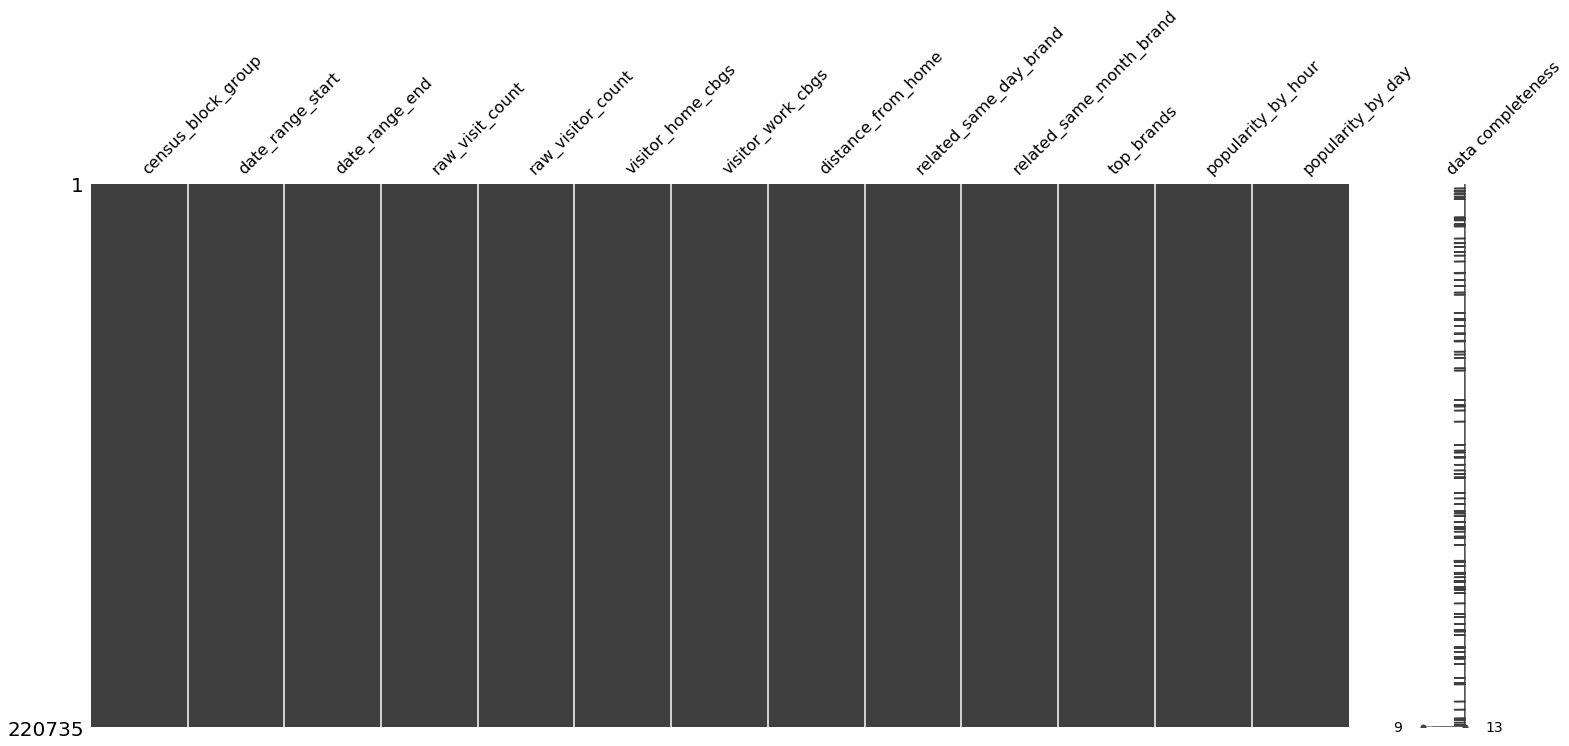

In [5]:
msno.matrix(data, labels=True)

### 可以看到，数据基本上没有什么缺失，在每一项的具体分析中再进行核对

### 这里还是先将缺失值填充为'NONE'

In [6]:
data = data.fillna('NONE')

# 4.对属性census_block_group进行分析

### 根据数据来源的说明，该属性为独一无二的12位FIPS编码，对其分析无太大意义，给出其数据缺失个数

In [7]:
print('census_block_group数据缺失总数： ',len(data[data['census_block_group'] == 'NONE']))

census_block_group数据缺失总数：  1


### 其缺失个数为1

# 5.对数值属性date_range_start进行分析

### 该属性定义为测量阶段开始的时间戳，先观察其数据分布

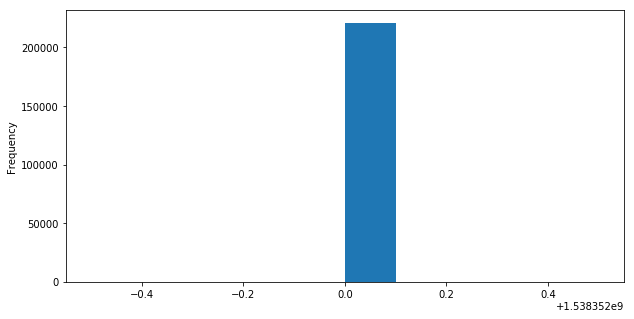

In [8]:
plt.figure(figsize=(10,5))
data['date_range_start'].plot(kind='hist',bins=10)
plt.show()

In [9]:
start = data['date_range_start'].value_counts()

In [10]:
print(start)

1538352000    220735
Name: date_range_start, dtype: int64


### 可以看到，该项属性的值均为1538352000，总共220735项，与总记录数一致，不存在数据缺失的情况。由于其数据相同，因此也不需要绘制盒图

# 6.对数值属性date_range_end进行分析

### 该属性定义为测量阶段结束的时间戳，先观察其数据分布

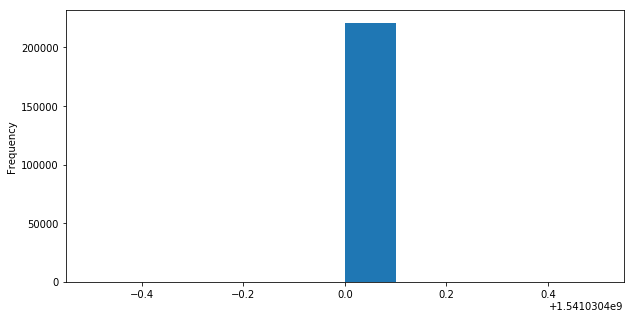

In [11]:
plt.figure(figsize=(10,5))
data['date_range_end'].plot(kind='hist',bins=10)
plt.show()

In [12]:
end = data['date_range_end'].value_counts()

In [13]:
print(end)

1541030400    220735
Name: date_range_end, dtype: int64


### 同样的，该项属性的值均为1538352000，总共220735项，与总记录数一致，不存在数据缺失的情况。由于其数据相同，因此也不需要绘制盒图

# 7.对数值属性raw_visit_count进行分析

## 7.1该属性定义为测量阶段内到访次数，先观察其数据分布

In [20]:
visit = data['raw_visit_count'].value_counts()

In [278]:
print(visit)

NONE        106
24531.0      15
10888.0      14
21721.0      14
12455.0      14
17567.0      13
17801.0      13
19911.0      13
8524.0       13
15073.0      13
27618.0      13
16773.0      13
15378.0      13
12980.0      13
12961.0      13
11894.0      13
21836.0      13
14482.0      13
16747.0      13
15161.0      13
17421.0      13
25796.0      13
5894.0       12
15061.0      12
15192.0      12
17659.0      12
11696.0      12
20541.0      12
16555.0      12
15338.0      12
           ... 
69591.0       1
69592.0       1
69594.0       1
69595.0       1
69599.0       1
69531.0       1
49895.0       1
69608.0       1
69609.0       1
69610.0       1
69613.0       1
69614.0       1
69585.0       1
69584.0       1
200653.0      1
69578.0       1
69574.0       1
38960.0       1
69571.0       1
300889.0      1
69566.0       1
180907.0      1
69559.0       1
69549.0       1
69548.0       1
200617.0      1
111366.0      1
69541.0       1
69537.0       1
131073.0      1
Name: raw_visit_count, L

### 可以看到，共有106项记录丢失数据，存在的数据中，最高频率为15，最低频率为1

### 现计算其分位数并绘制盒图，由于盒图中不能包含非数值型数据，因此将表示丢失数据的'NONE'先移除

In [29]:
rn_visit = visit.drop('NONE').index

## 7.2五数概括

In [30]:
mini_visit = np.percentile(rn_visit, 0)
Q1_visit = np.percentile(rn_visit, 25)
Q2_visit = np.percentile(rn_visit, 50)
Q3_visit = np.percentile(rn_visit, 75)
maxi_visit = np.percentile(rn_visit, 100)
print('最小值：',mini_visit)
print('Q1：',Q1_visit)
print('Q2：',Q2_visit)
print('Q3：',Q3_visit)
print('最大值：',maxi_visit)

最小值： 60.0
Q1： 25760.25
Q2： 51783.5
Q3： 93742.75
最大值： 7179900.0


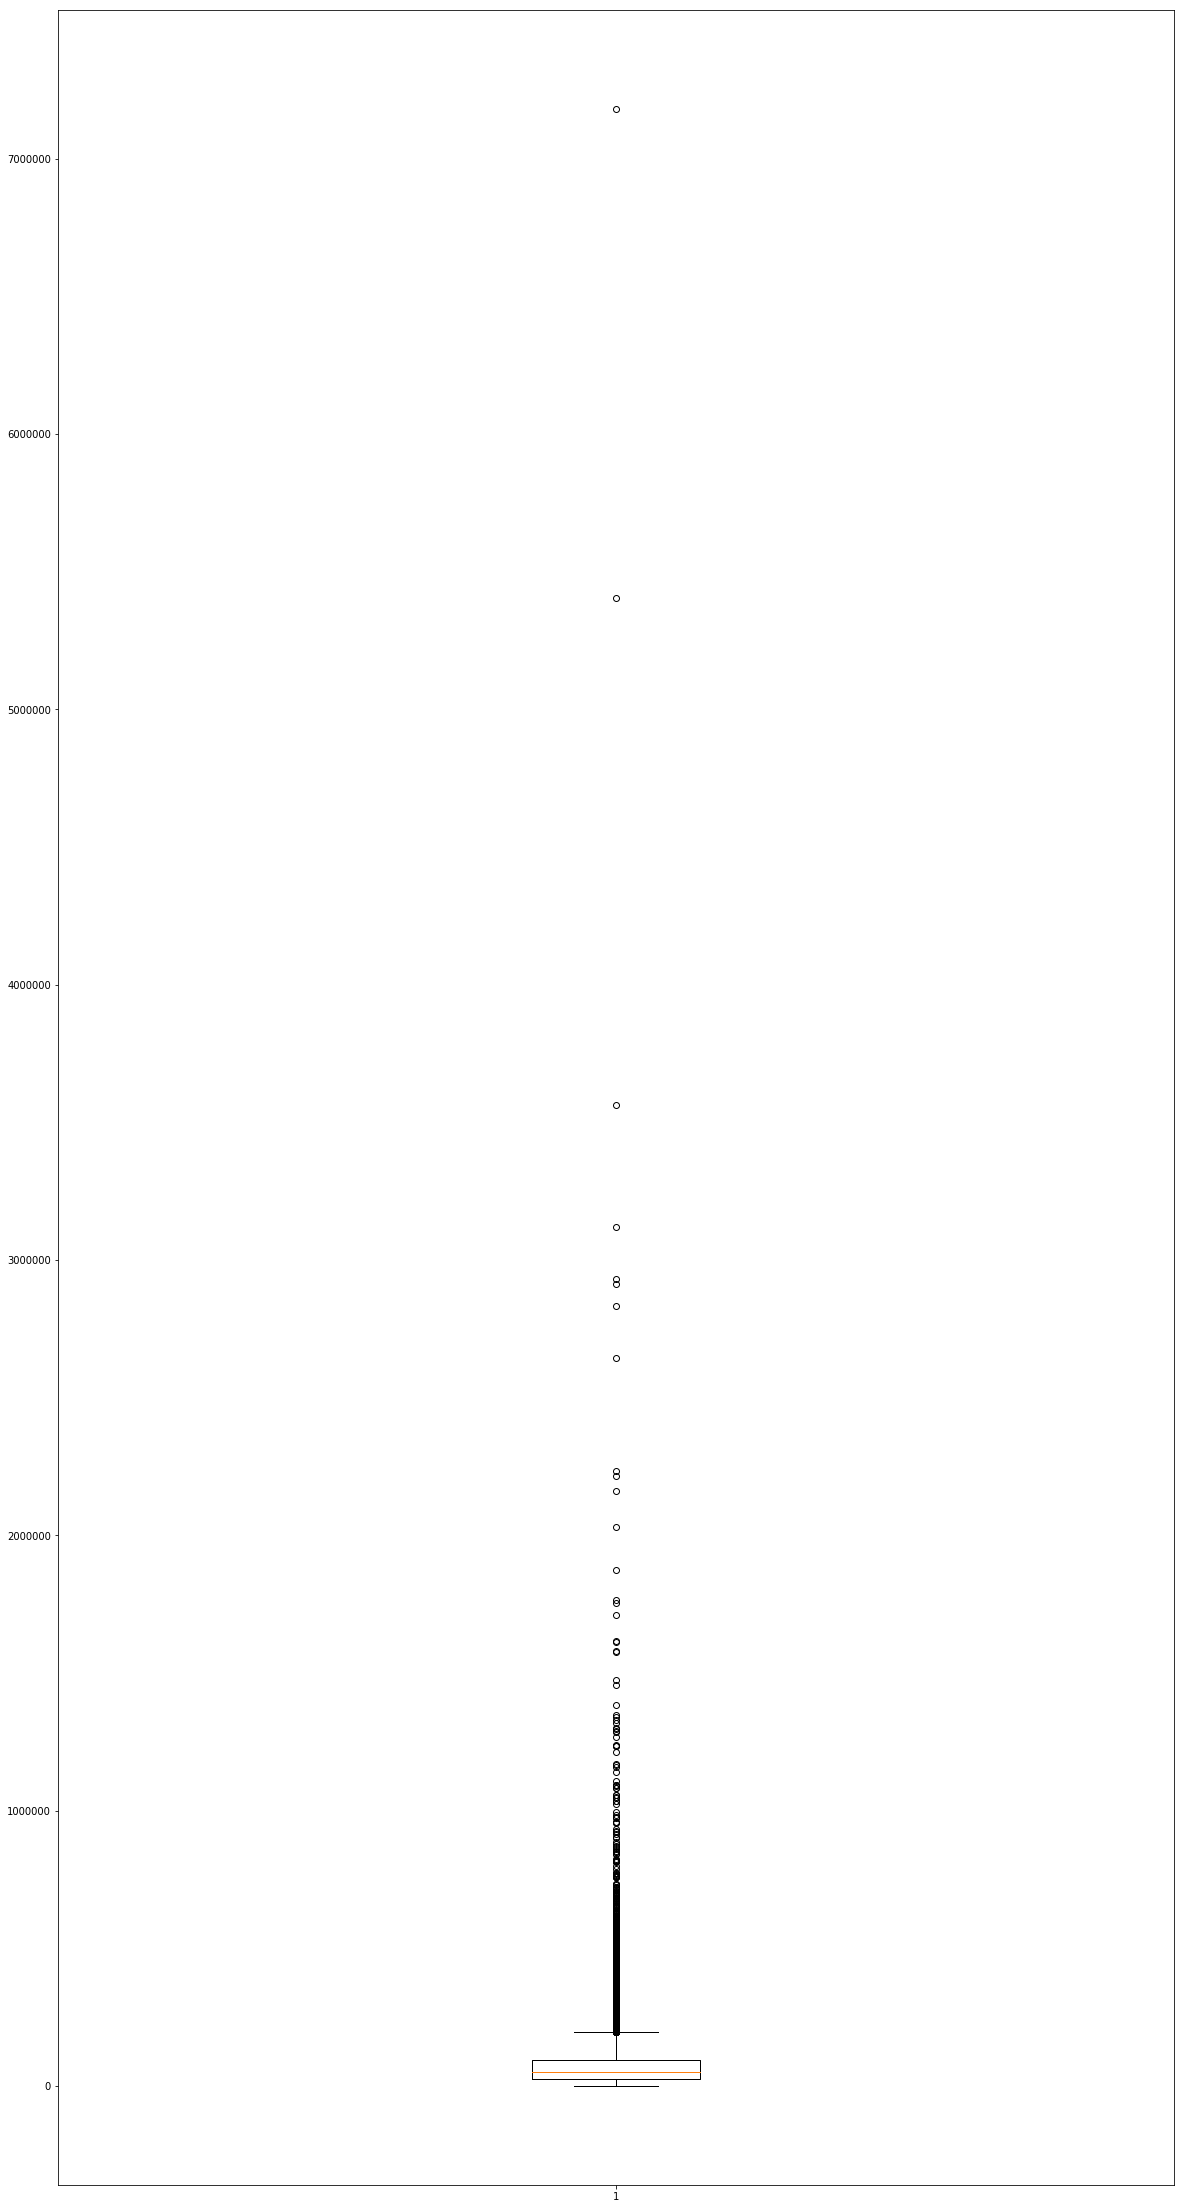

In [285]:
plt.figure(figsize=(20,40))
plt.boxplot(rn_visit.tolist())
plt.show()

### 计算离群点个数

In [31]:
IQR_visit = Q3_visit - Q1_visit
ob_mini_visit = Q1_visit - 1.5*IQR_visit
ob_maxi_visit = Q3_visit + 1.5*IQR_visit

In [32]:
lower_outlier_visit = 0
upper_outlier_visit = 0
for num in rn_visit:
    if num < ob_mini_visit:
        lower_outlier_visit += 1
    elif num > ob_maxi_visit:
        upper_outlier_visit += 1
print('下离群点个数： ', lower_outlier_visit)
print('上离群点个数： ', upper_outlier_visit)

下离群点个数：  0
上离群点个数：  5452


### 可以看到，数据集中向下分布。向上分布较为分散，离群点个数为5452

# 7.3缺失值填充

### 7.3.1将缺失部分剔除

### 绘制盒图时未考虑缺失部分，因此剔除缺失部分的效果与原始处理效果一样

### 7.3.2用最高频率值来填补缺失值

In [296]:
visit_s2 = data['raw_visit_count'].replace('NONE', 24531.0).value_counts().index

In [298]:
mini_visit = np.percentile(visit_s2, 0)
Q1_visit = np.percentile(visit_s2, 25)
Q2_visit = np.percentile(visit_s2, 50)
Q3_visit = np.percentile(visit_s2, 75)
maxi_visit = np.percentile(visit_s2, 100)
print('最小值：',mini_visit)
print('Q1：',Q1_visit)
print('Q2：',Q2_visit)
print('Q3：',Q3_visit)
print('最大值：',maxi_visit)

最小值： 60.0
Q1： 25760.25
Q2： 51783.5
Q3： 93742.75
最大值： 7179900.0


### 五数概括没有变化

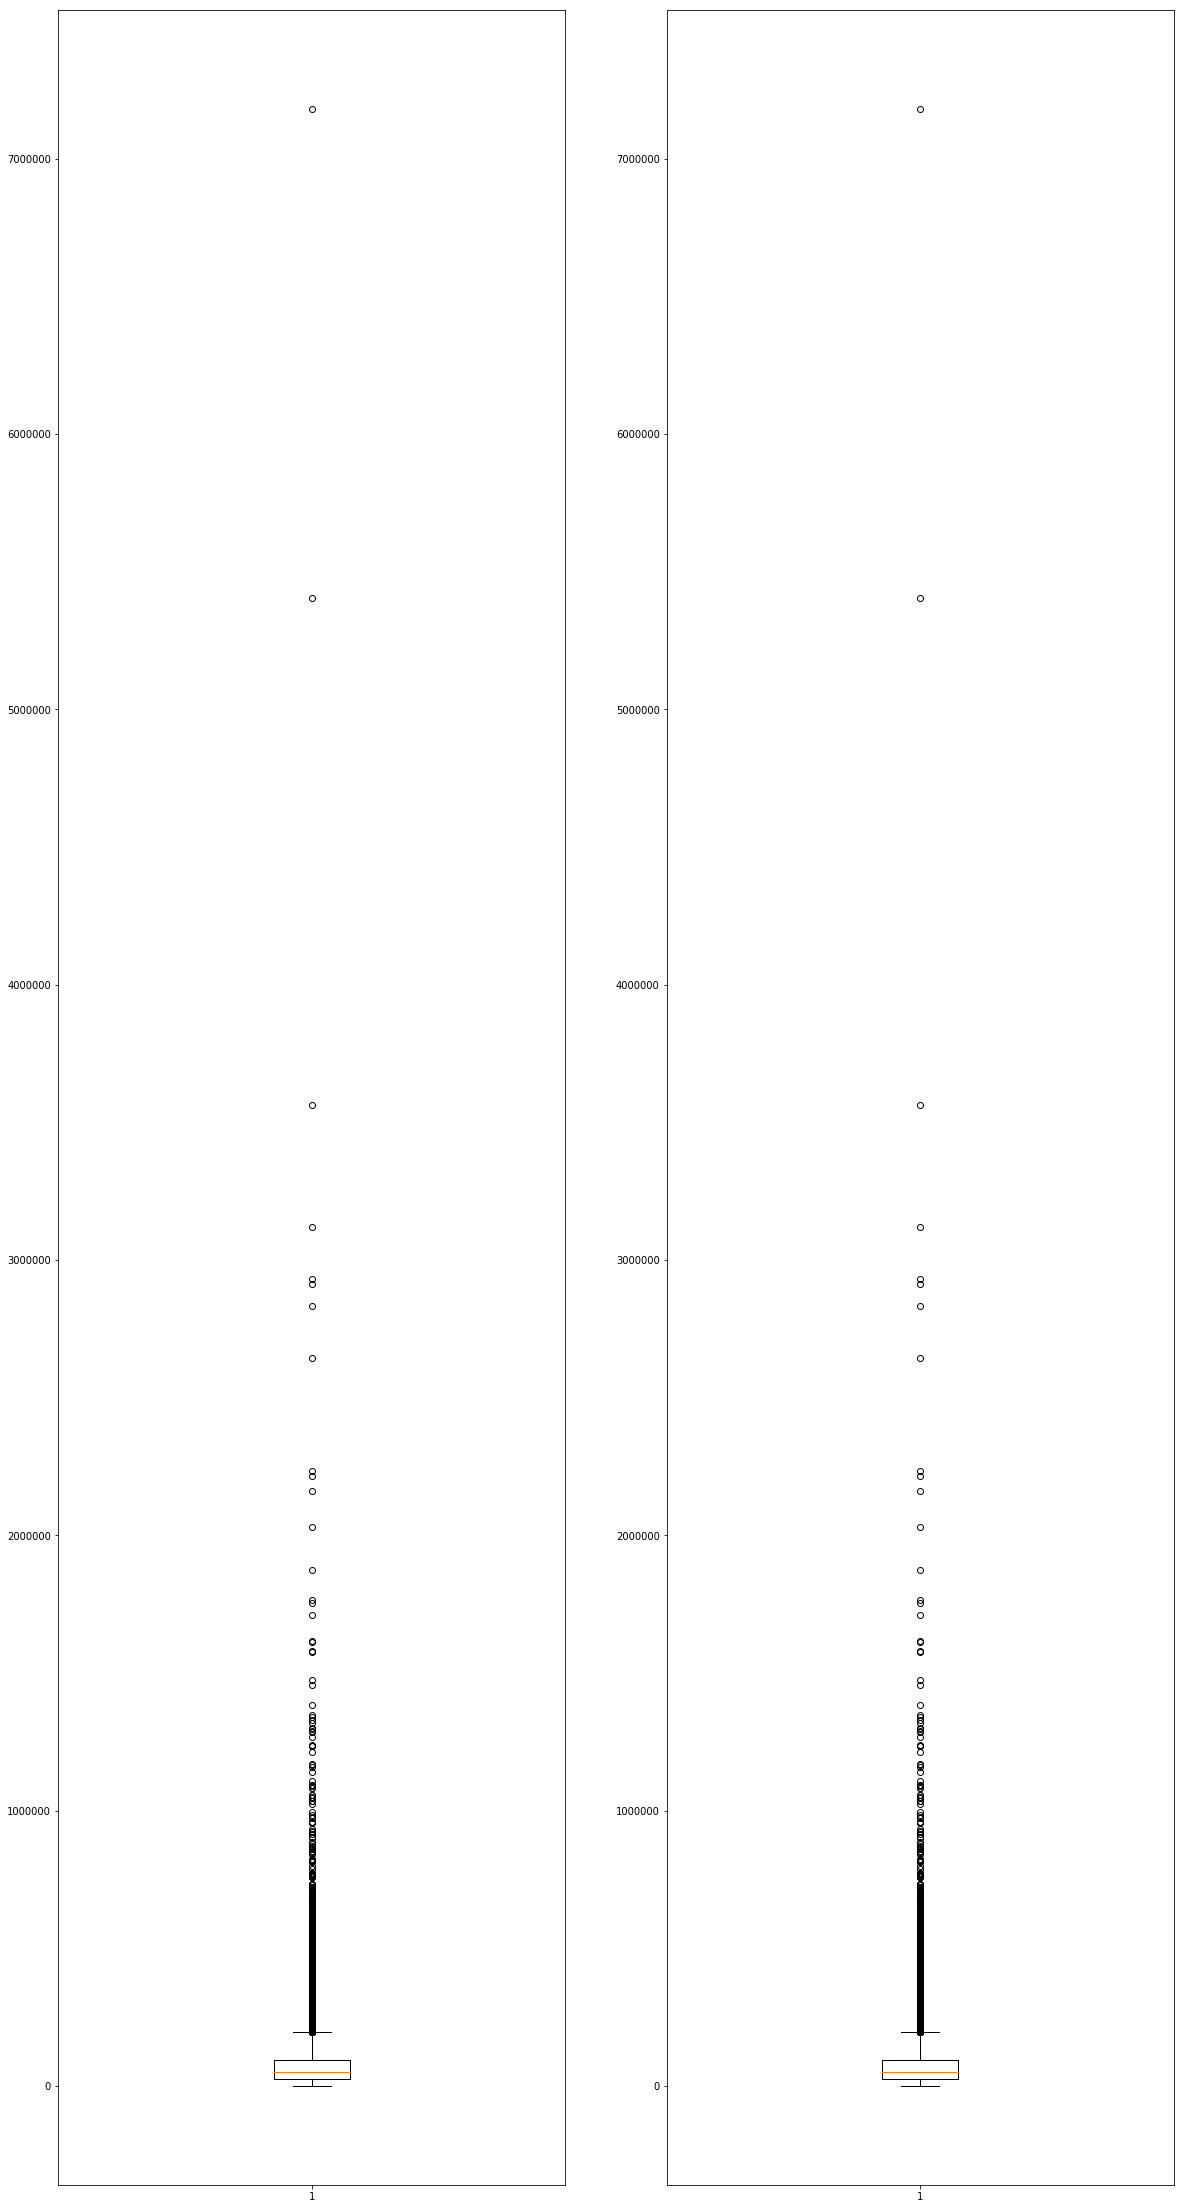

In [311]:
plt.figure(figsize=(20,40))
plt.subplot(1,2,1)
plt.boxplot(rn_visit.tolist())
plt.subplot(1,2,2)
plt.boxplot(visit_s2.tolist())
plt.show()

### 盒图也没有太大变化

### 7.3.3用属性的相关关系来填补缺失值

### 未发现该属性与其他属性间存在可计算的相关关系

# 8.对数值属性raw_visitor_count进行分析

## 8.1该属性定义为测量阶段内来访者的数量，相同的来访者仅统计一次

### 先观察其分布

In [33]:
visitor = data['raw_visitor_count'].value_counts()

In [34]:
print(visitor)

NONE       106
2292.0      39
3302.0      37
3106.0      36
2444.0      36
3461.0      36
2754.0      35
1886.0      35
2133.0      35
2731.0      35
2733.0      35
3952.0      35
3230.0      35
3255.0      35
2344.0      35
1999.0      35
2491.0      35
1615.0      35
3584.0      35
2598.0      34
2894.0      34
3826.0      34
2326.0      34
3334.0      34
1866.0      34
3530.0      34
2472.0      34
2115.0      33
3446.0      33
2128.0      33
          ... 
31475.0      1
31407.0      1
31448.0      1
31412.0      1
31416.0      1
31417.0      1
96955.0      1
31422.0      1
31425.0      1
31426.0      1
74014.0      1
31432.0      1
31436.0      1
31443.0      1
96982.0      1
31449.0      1
31474.0      1
31451.0      1
31454.0      1
31456.0      1
31459.0      1
31460.0      1
31462.0      1
31464.0      1
31465.0      1
31466.0      1
31467.0      1
68157.0      1
75101.0      1
65539.0      1
Name: raw_visitor_count, Length: 41484, dtype: int64


### 同样的，该数据分布也是相对分散，同时有106项出现缺失，为了后续的计算，还是还将其移除

In [35]:
rn_visitor = visitor.drop('NONE').index

## 8.2五数概括

In [36]:
mini_visitor = np.percentile(rn_visitor, 0)
Q1_visitor = np.percentile(rn_visitor, 25)
Q2_visitor = np.percentile(rn_visitor, 50)
Q3_visitor = np.percentile(rn_visitor, 75)
maxi_visitor = np.percentile(rn_visitor, 100)
print('最小值：',mini_visitor)
print('Q1：',Q1_visitor)
print('Q2：',Q2_visitor)
print('Q3：',Q3_visitor)
print('最大值：',maxi_visitor)

最小值： 50.0
Q1： 10474.5
Q2： 21353.0
Q3： 37299.5
最大值： 6113949.0


### 同样的，数据分布差异太大，离群点个数较多，其离群点个数如下

In [37]:
IQR_visitor = Q3_visitor - Q1_visitor
ob_mini_visitor = Q1_visitor - 1.5*IQR_visitor
ob_maxi_visitor = Q3_visitor + 1.5*IQR_visitor

In [38]:
lower_outlier_visitor = 0
upper_outlier_visitor = 0
for num in rn_visitor:
    if num < ob_mini_visitor:
        lower_outlier_visitor += 1
    elif num > ob_maxi_visitor:
        upper_outlier_visitor += 1
print('下离群点个数： ', lower_outlier_visitor)
print('上离群点个数： ', upper_outlier_visitor)

下离群点个数：  0
上离群点个数：  1724


### 同样的，数据集中向下分布。向上分布较为分散，离群点个数为1724

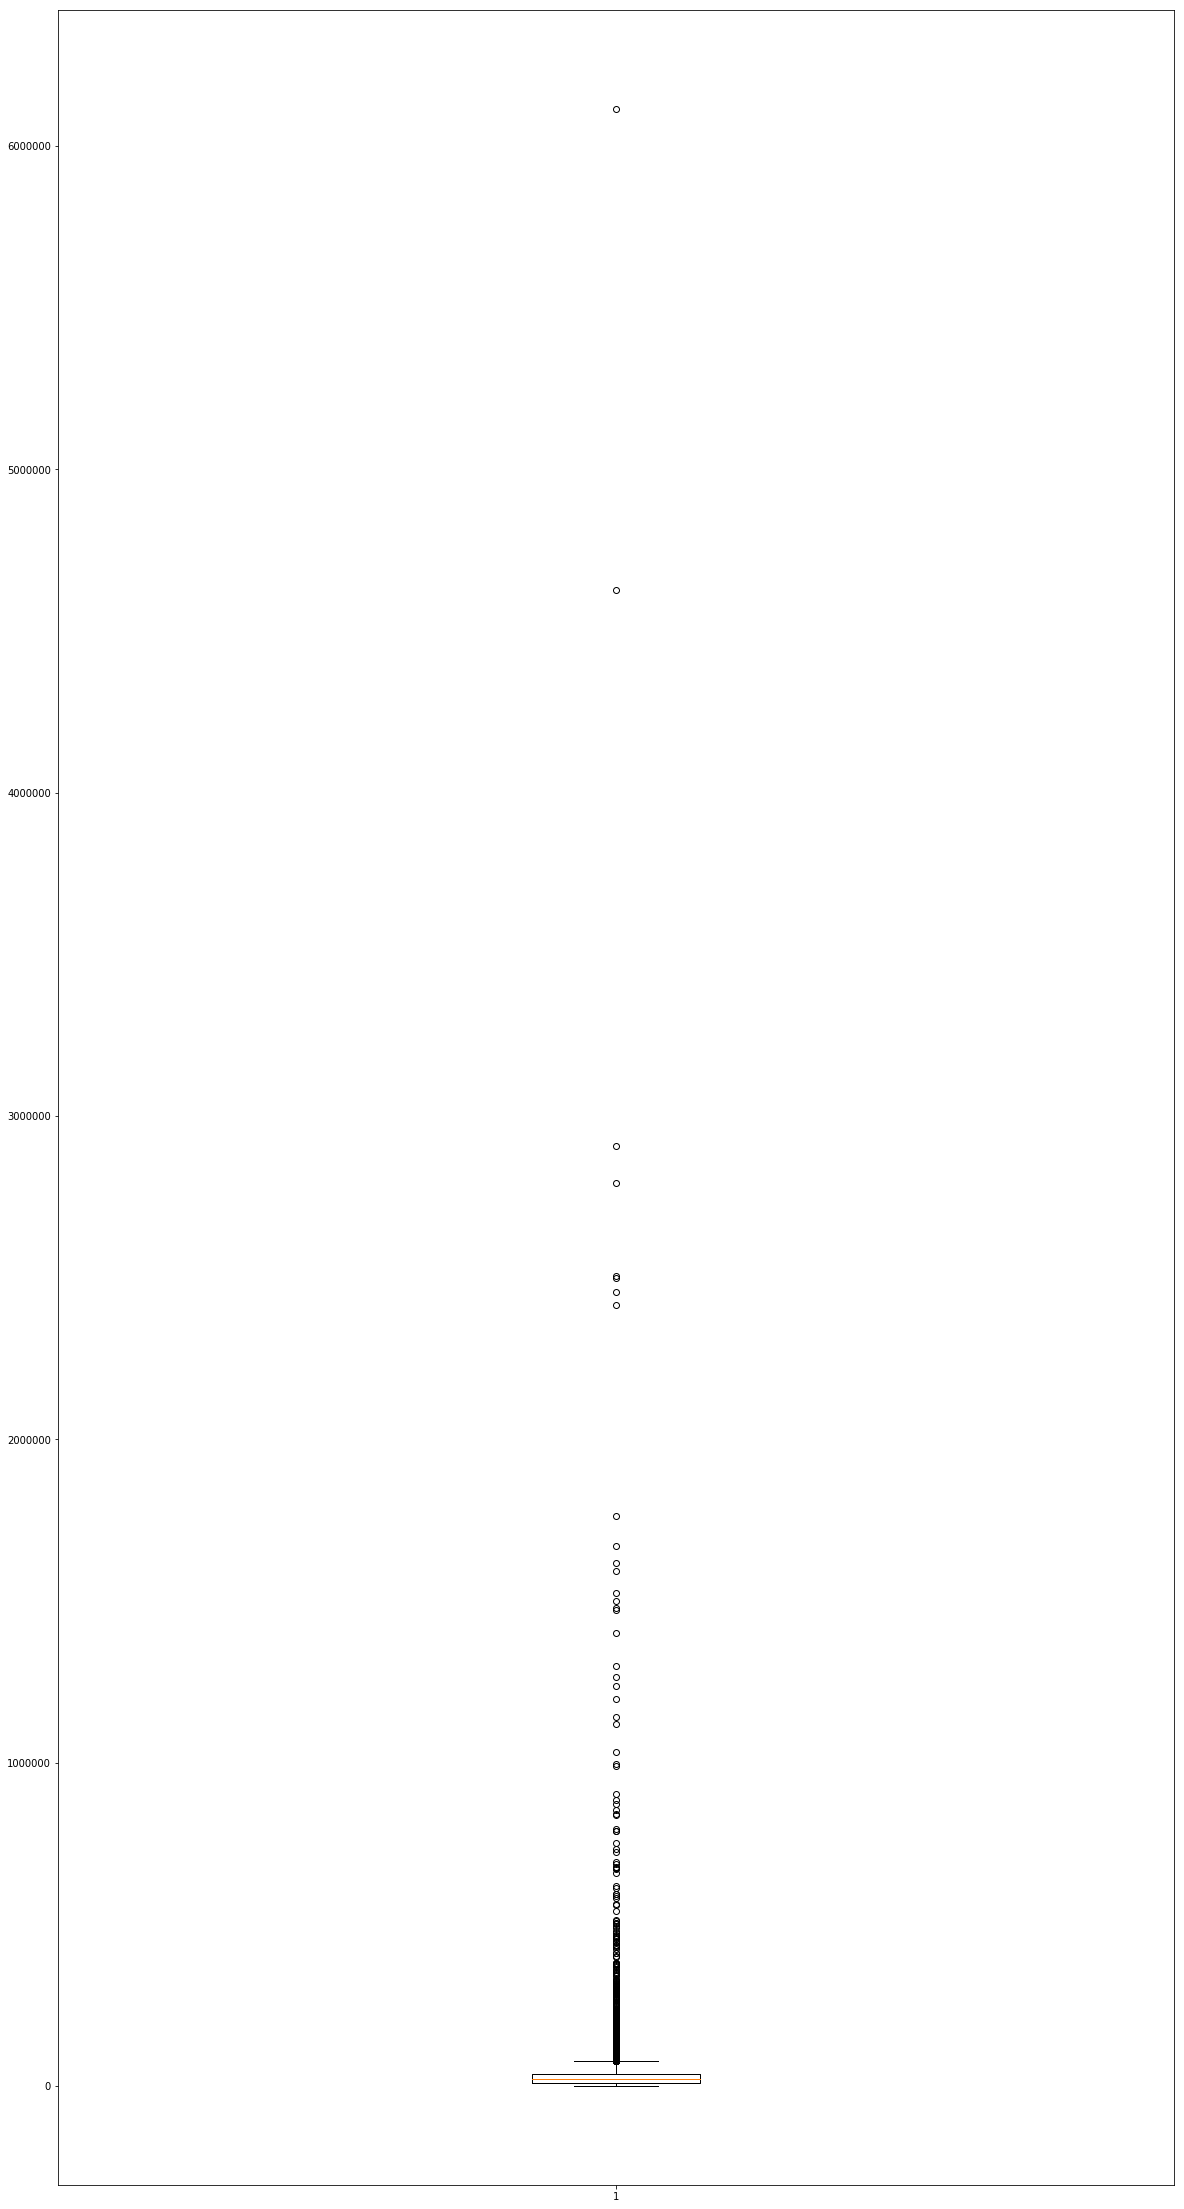

In [316]:
plt.figure(figsize=(20,40))
plt.boxplot(rn_visitor.tolist())
plt.show()

# 8.3缺失值填充

### 8.3.1将缺失部分剔除

### 绘制盒图时未考虑缺失部分，因此剔除缺失部分的效果与原始处理效果一样

### 8.3.2用最高频率值来填补缺失值

In [318]:
visitor_s2 = data['raw_visitor_count'].replace('NONE', 2292.0).value_counts().index

In [319]:
mini_visitor = np.percentile(visitor_s2, 0)
Q1_visitor = np.percentile(visitor_s2, 25)
Q2_visitor = np.percentile(visitor_s2, 50)
Q3_visitor = np.percentile(visitor_s2, 75)
maxi_visitor = np.percentile(visitor_s2, 100)
print('最小值：',mini_visitor)
print('Q1：',Q1_visitor)
print('Q2：',Q2_visitor)
print('Q3：',Q3_visitor)
print('最大值：',maxi_visitor)

最小值： 50.0
Q1： 10474.5
Q2： 21353.0
Q3： 37299.5
最大值： 6113949.0


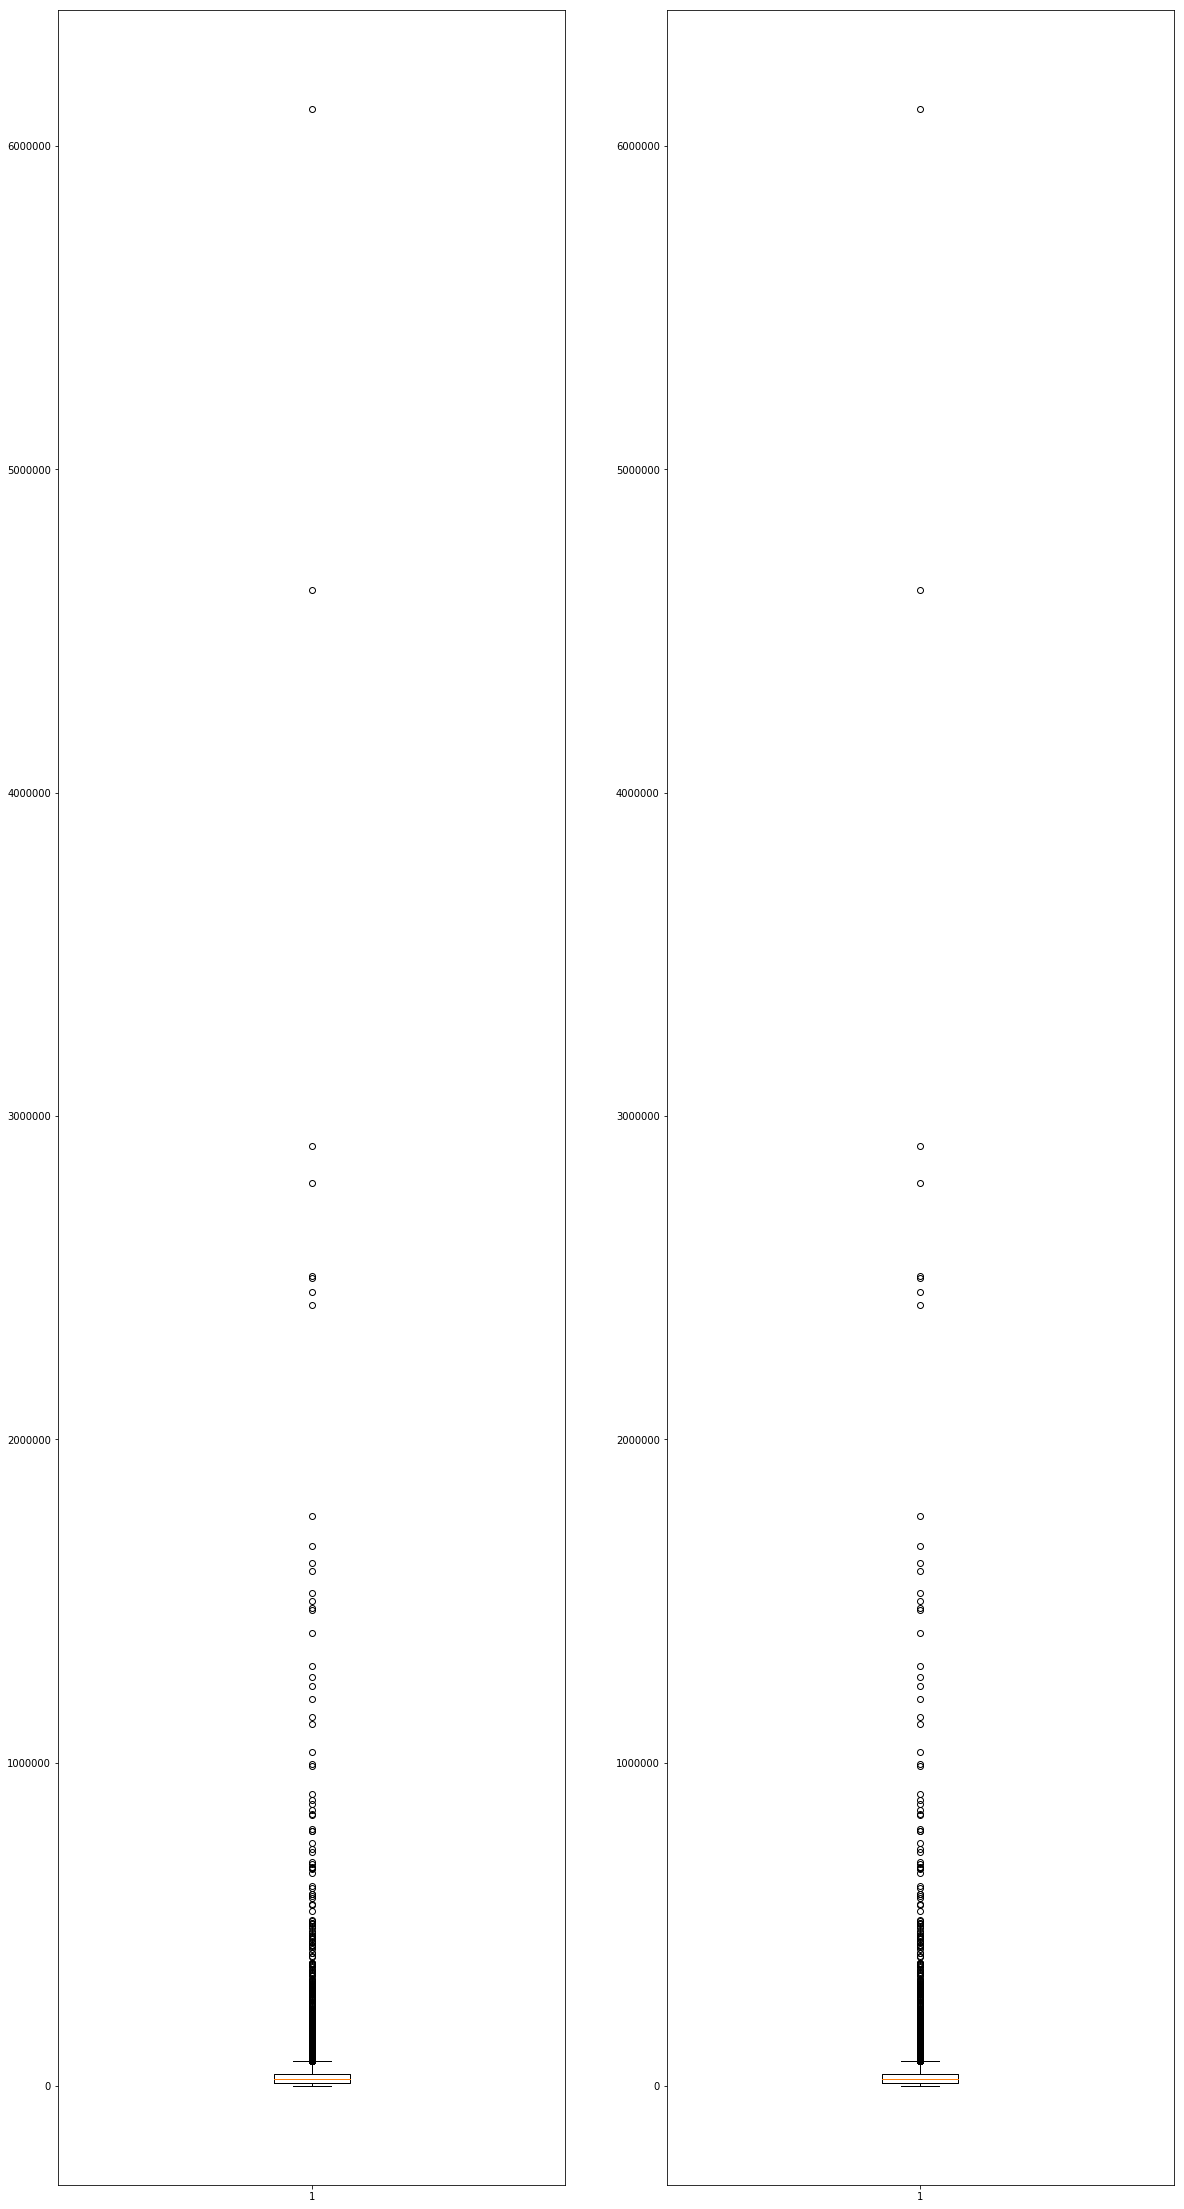

In [322]:
plt.figure(figsize=(20,40))
plt.subplot(1,2,1)
plt.boxplot(rn_visitor.tolist())
plt.subplot(1,2,2)
plt.boxplot(visitor_s2.tolist())
plt.show()

### 五数概括和盒图均为有明显变化

# 9.对visit_home_cbgs进行分析

### 该属性的每一个记录为字典，这里先对所有字典进行合并处理，然后进行分析

In [39]:
homecbgs = data['visitor_home_cbgs']

### 由于算力有限，对于220735项字典进行合并不太可行，因此这里对前5项字典进行合并分析

In [40]:
home_l = []
for i in range(5):
    if isinstance(homecbgs[i], str):
        home_l.append(ast.literal_eval(homecbgs[i]))

In [41]:
dic_home = {}
for i in range(5):
    dic_home = Counter(dic_home) + Counter(home_l[i])
dic_home = dict(dic_home)

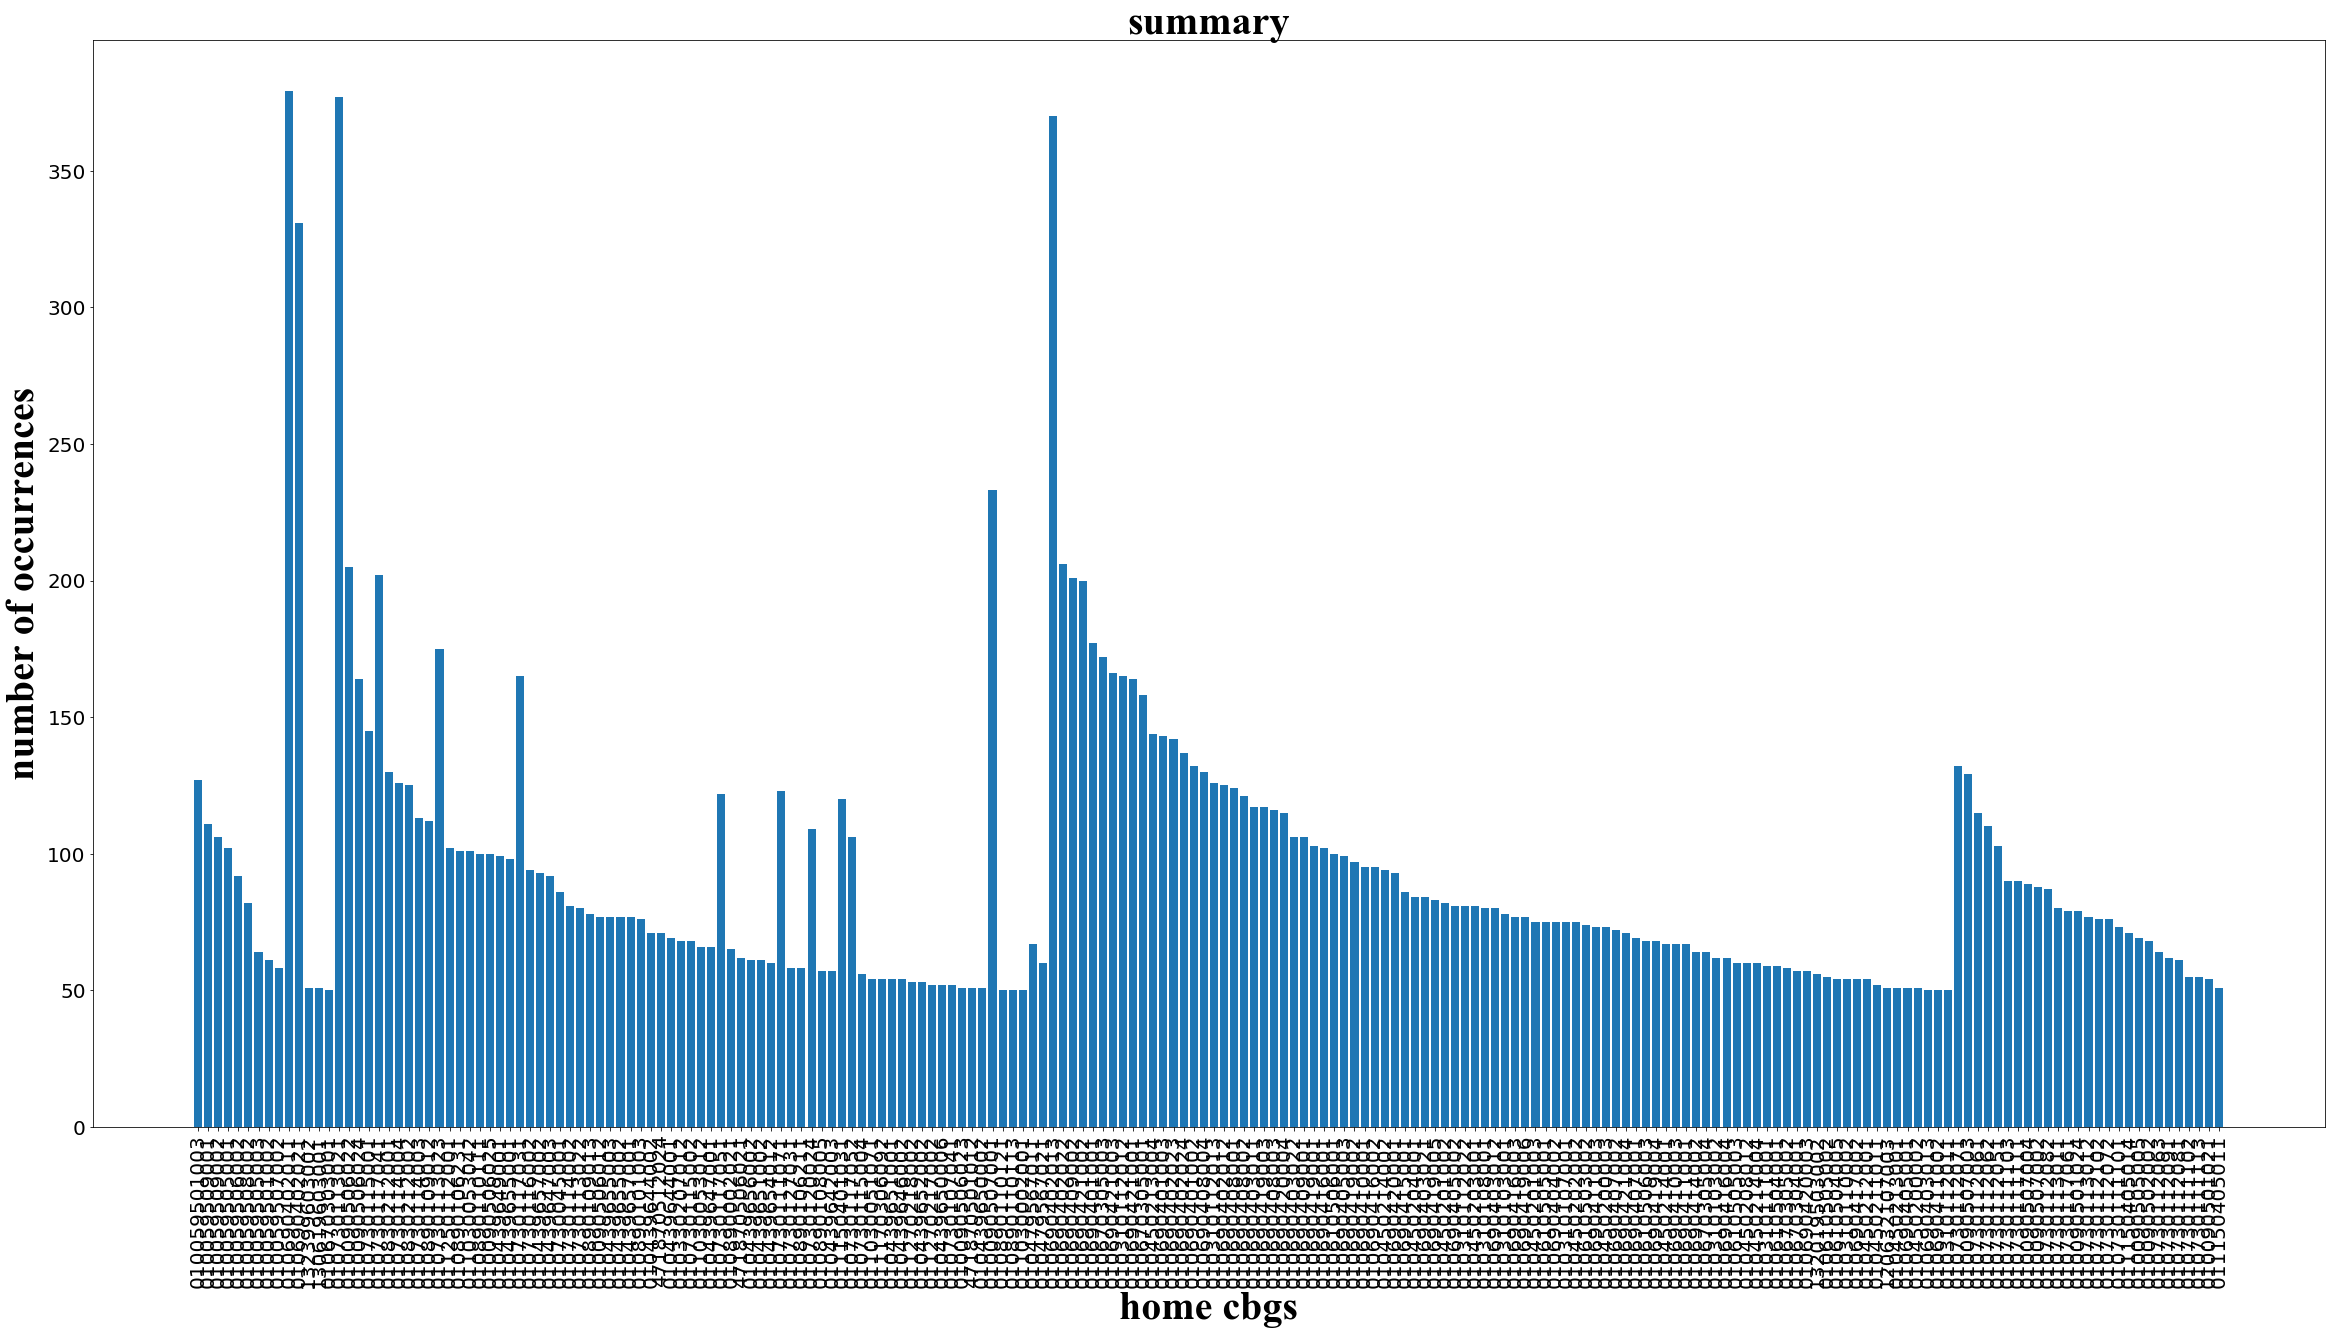

In [42]:
x = dic_home.keys()
y = dic_home.values()
plt.figure(figsize=(40, 20))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('home cbgs', font)
plt.ylabel('number of occurrences', font)
plt.title('summary', font)
plt.show()

### 可以看到，每一项字典下面的分布较为均匀，但可能会出现某一两个来访特别多的情况

### 由于该项的记录为字典形式，且无明显相关关系，因此不对缺失值进行处理

# 10.对visitor_work_cbgs进行分析

### 同样的，该属性每一项记录为一个字典

In [246]:
workcbgs = data['visitor_work_cbgs']

### 由于算力有限，对于220735项字典进行合并不太可行，因此这里对前5项字典进行合并分析

In [247]:
dic_work = {}
for i in range(5):
    if isinstance(workcbgs[i], str):
        dic_work = Counter(dic_work) + Counter(ast.literal_eval(workcbgs[i]))
dic_work = dict(dic_work)

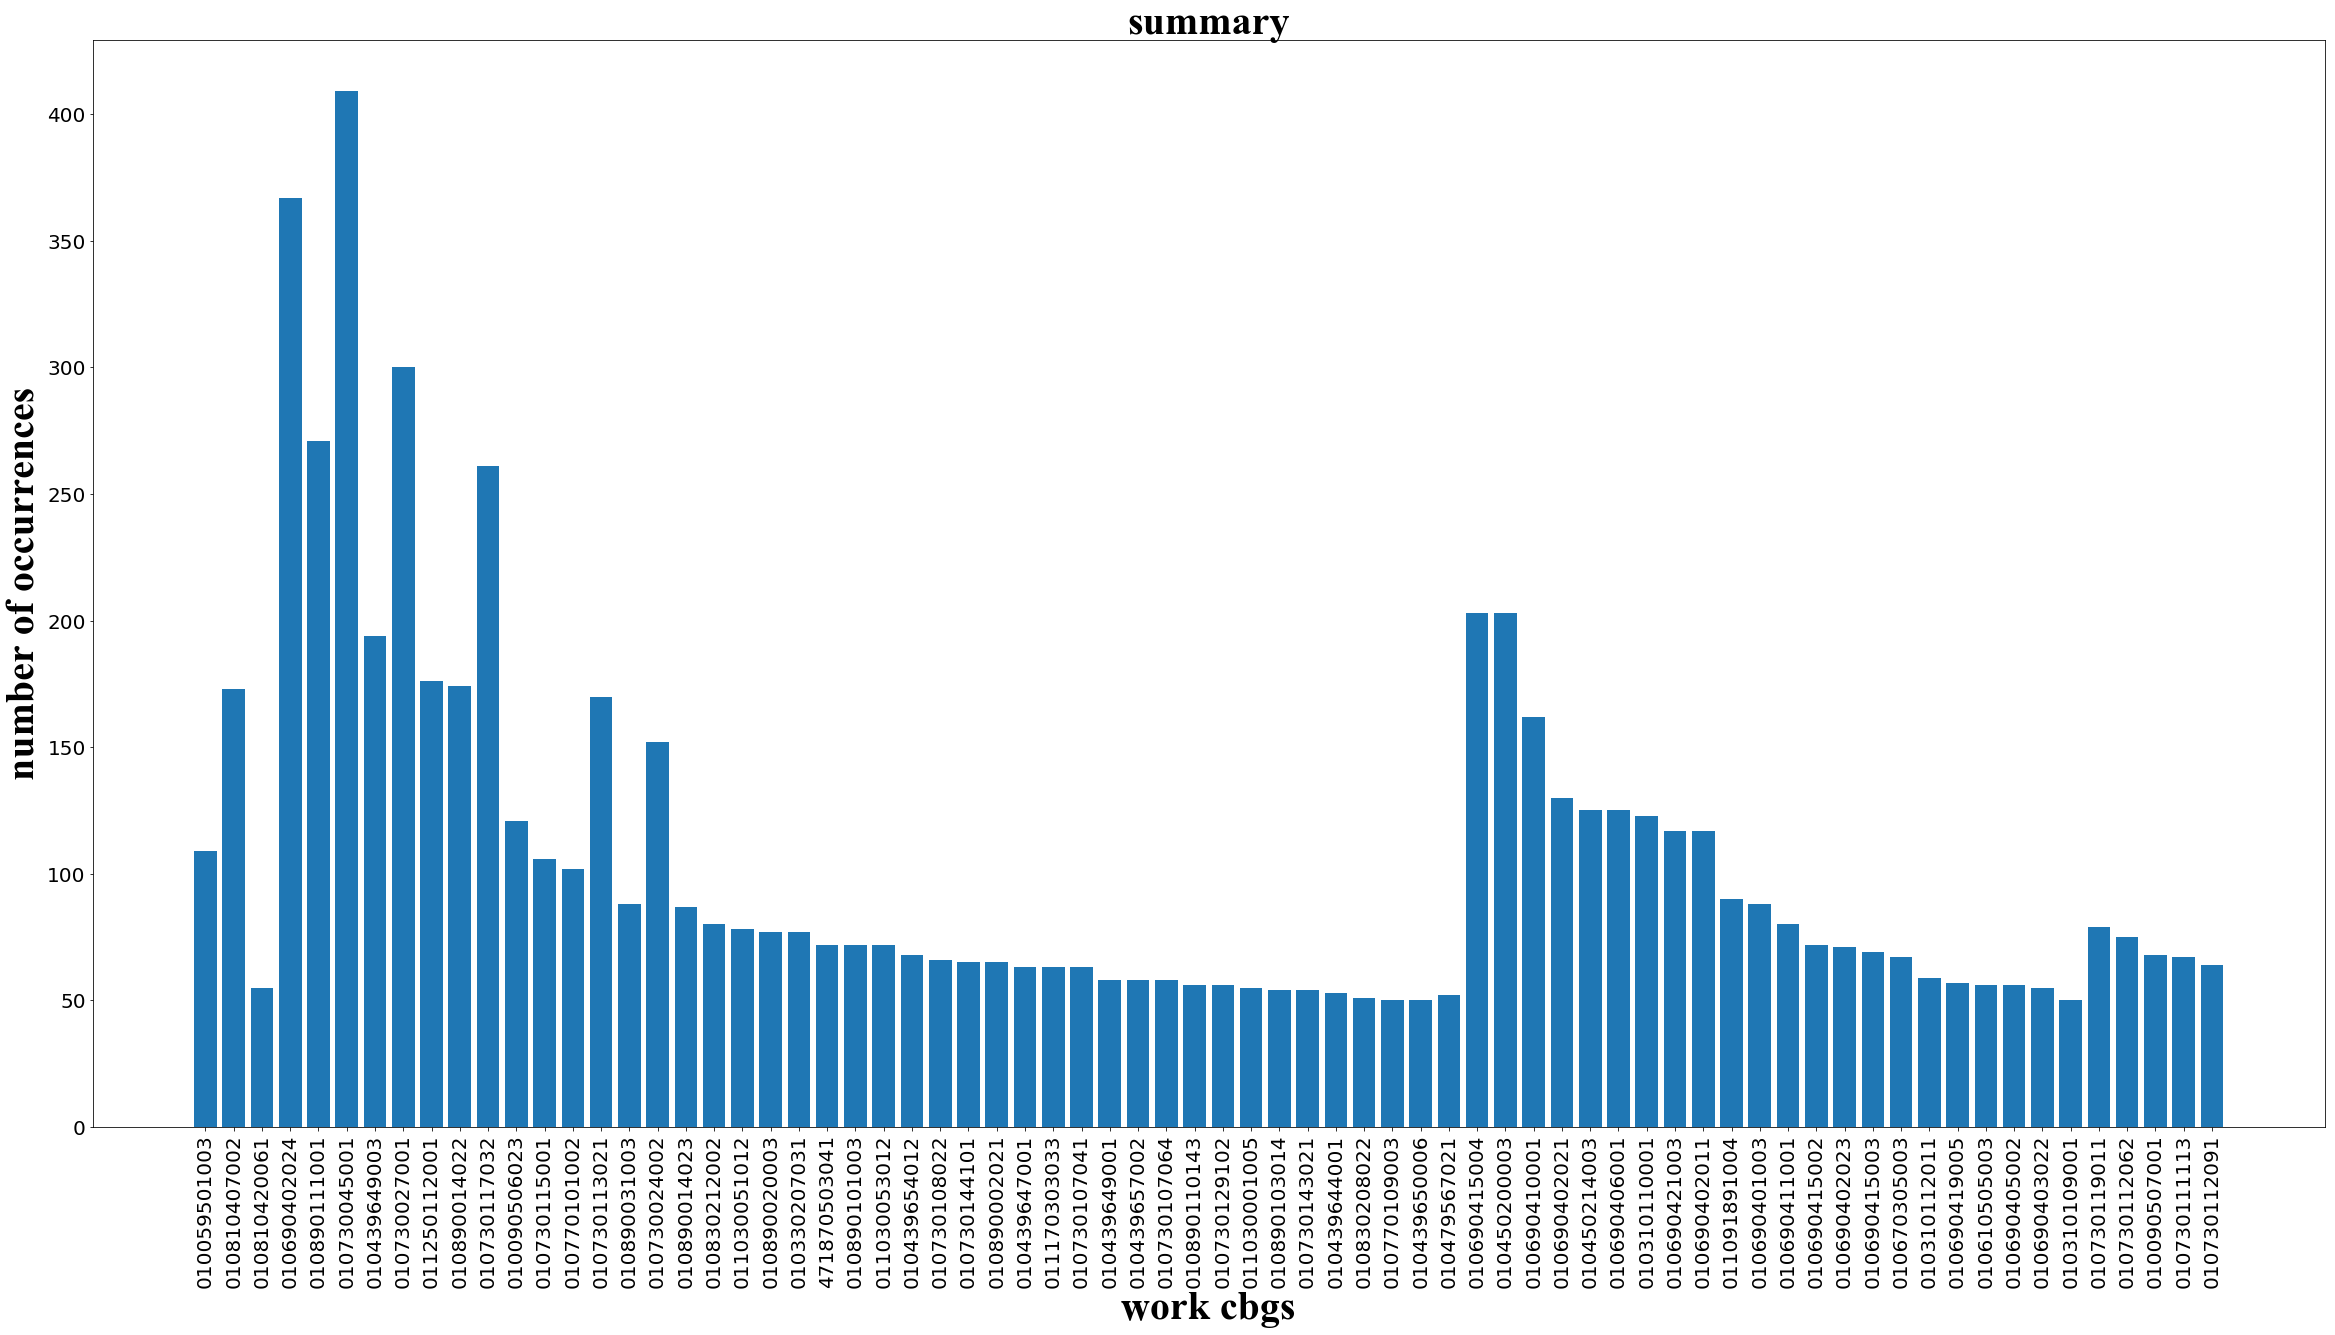

In [248]:
x = dic_work.keys()
y = dic_work.values()
plt.figure(figsize=(40, 20))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
font = {'family':'Times New Roman', 'size':40}
plt.xlabel('work cbgs', font)
plt.ylabel('number of occurrences', font)
plt.title('summary', font)
plt.show()

### 同样的，每一项字典下面的分布较为均匀，但可能会出现某一两个来访特别多的情况

### 由于该项的记录为字典形式，且无明显相关关系，因此不对缺失值进行处理

# 11.对数值属性distance_from_home进行分析

## 11.1该属性为拜访者到达地点与家的距离，观察其数据分布

In [50]:
distance = data['distance_from_home'].value_counts()

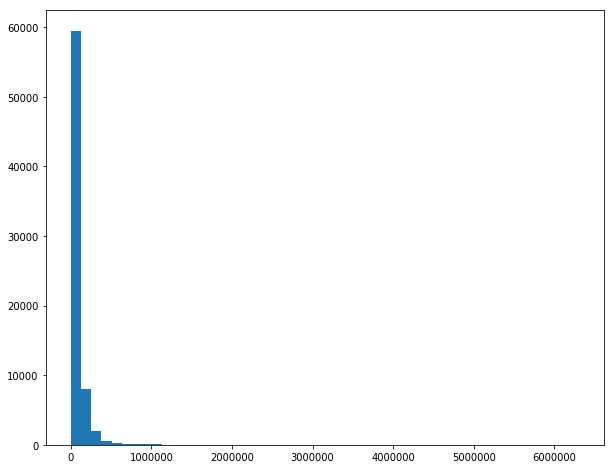

In [74]:
rn_distance = distance.drop('NONE').index
plt.figure(figsize=(10, 8))
plt.hist(rn_distance.tolist(), 50)
plt.show()

## 11.2五数概括

In [76]:
mini_distance = np.percentile(rn_distance, 0)
Q1_distance = np.percentile(rn_distance, 25)
Q2_distance = np.percentile(rn_distance, 50)
Q3_distance = np.percentile(rn_distance, 75)
maxi_distance = np.percentile(rn_distance, 100)
print('最小值：',mini_distance)
print('Q1：',Q1_distance)
print('Q2：',Q2_distance)
print('Q3：',Q3_distance)
print('最大值：',maxi_distance)

最小值： 706.0
Q1： 19899.0
Q2： 40997.0
Q3： 87553.0
最大值： 6297845.0


### 同样的，数据差异太大，计算其离群点个数

In [77]:
IQR_distance = Q3_distance - Q1_distance
ob_mini_distance = Q1_distance - 1.5*IQR_distance
ob_maxi_distance = Q3_distance + 1.5*IQR_distance

In [78]:
lower_outlier_distance = 0
upper_outlier_distance = 0
for num in rn_distance:
    if num < ob_mini_distance:
        lower_outlier_distance += 1
    elif num > ob_maxi_distance:
        upper_outlier_distance += 1
print('下离群点个数： ', lower_outlier_distance)
print('上离群点个数： ', upper_outlier_distance)

下离群点个数：  0
上离群点个数：  5545


### 数据集中向下分布，上离群点个数：  5545

## 11.3数据缺失处理

In [67]:
print('distance_from_home数据缺失总数： ',len(data[data['distance_from_home'] == 'NONE']))

distance_from_home数据缺失总数：  217


### 数据缺失总数为217

### 11.3.1剔除缺失数据

### 由于该项属性为数值属性，因此，剔除缺失数据跟原始处理方式一样，不进行对比

## 11.3.2用最高频率值填补缺失值

In [90]:
print(distance.index[0], distance.index[1])

NONE 8345.0


### 最高频率为8345，所有将217个缺失数据填充为8345

In [326]:
distance_s2 = data['distance_from_home'].replace('NONE', 8345.0).value_counts().index

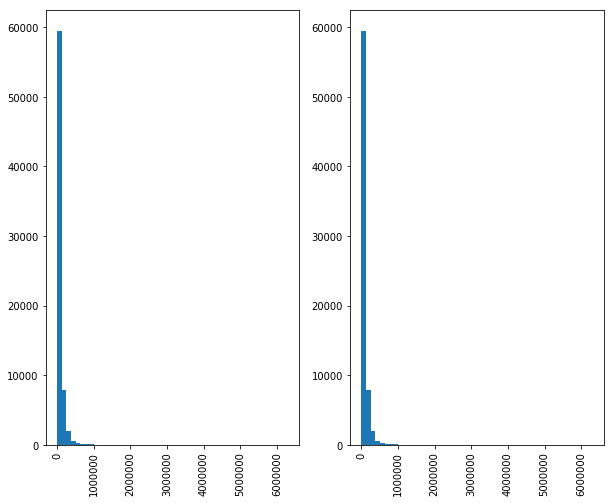

In [329]:
plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.hist(rn_distance.tolist(), 50, label='x')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.hist(distance_s2.tolist(), 50, label='y')
plt.xticks(rotation=90)
plt.show()

## 11.3.3用属性的相关关系来填补缺失值

### 由于缺少相关坐标，因此无法使用属性的相关关系来计算距离

# 12.对属性related_same_day_brand进行分析

## 12.1该项属性的每一项记录包含多个，尝试将其合并分析

In [115]:
day_brand = data['related_same_day_brand']

In [169]:
day_l = []
for i in range(len(day_brand)):
    if isinstance(day_brand[i], str):
        day_l.append(ast.literal_eval(day_brand[i]))

## 12.2前50个记录合并可视化

In [170]:
dic_day = dict()
for i in range(50):
    for j in range(len(day_l[i])):
        dic_day[day_l[i][j]] = dic_day.get(day_l[i][j], 0) + 1

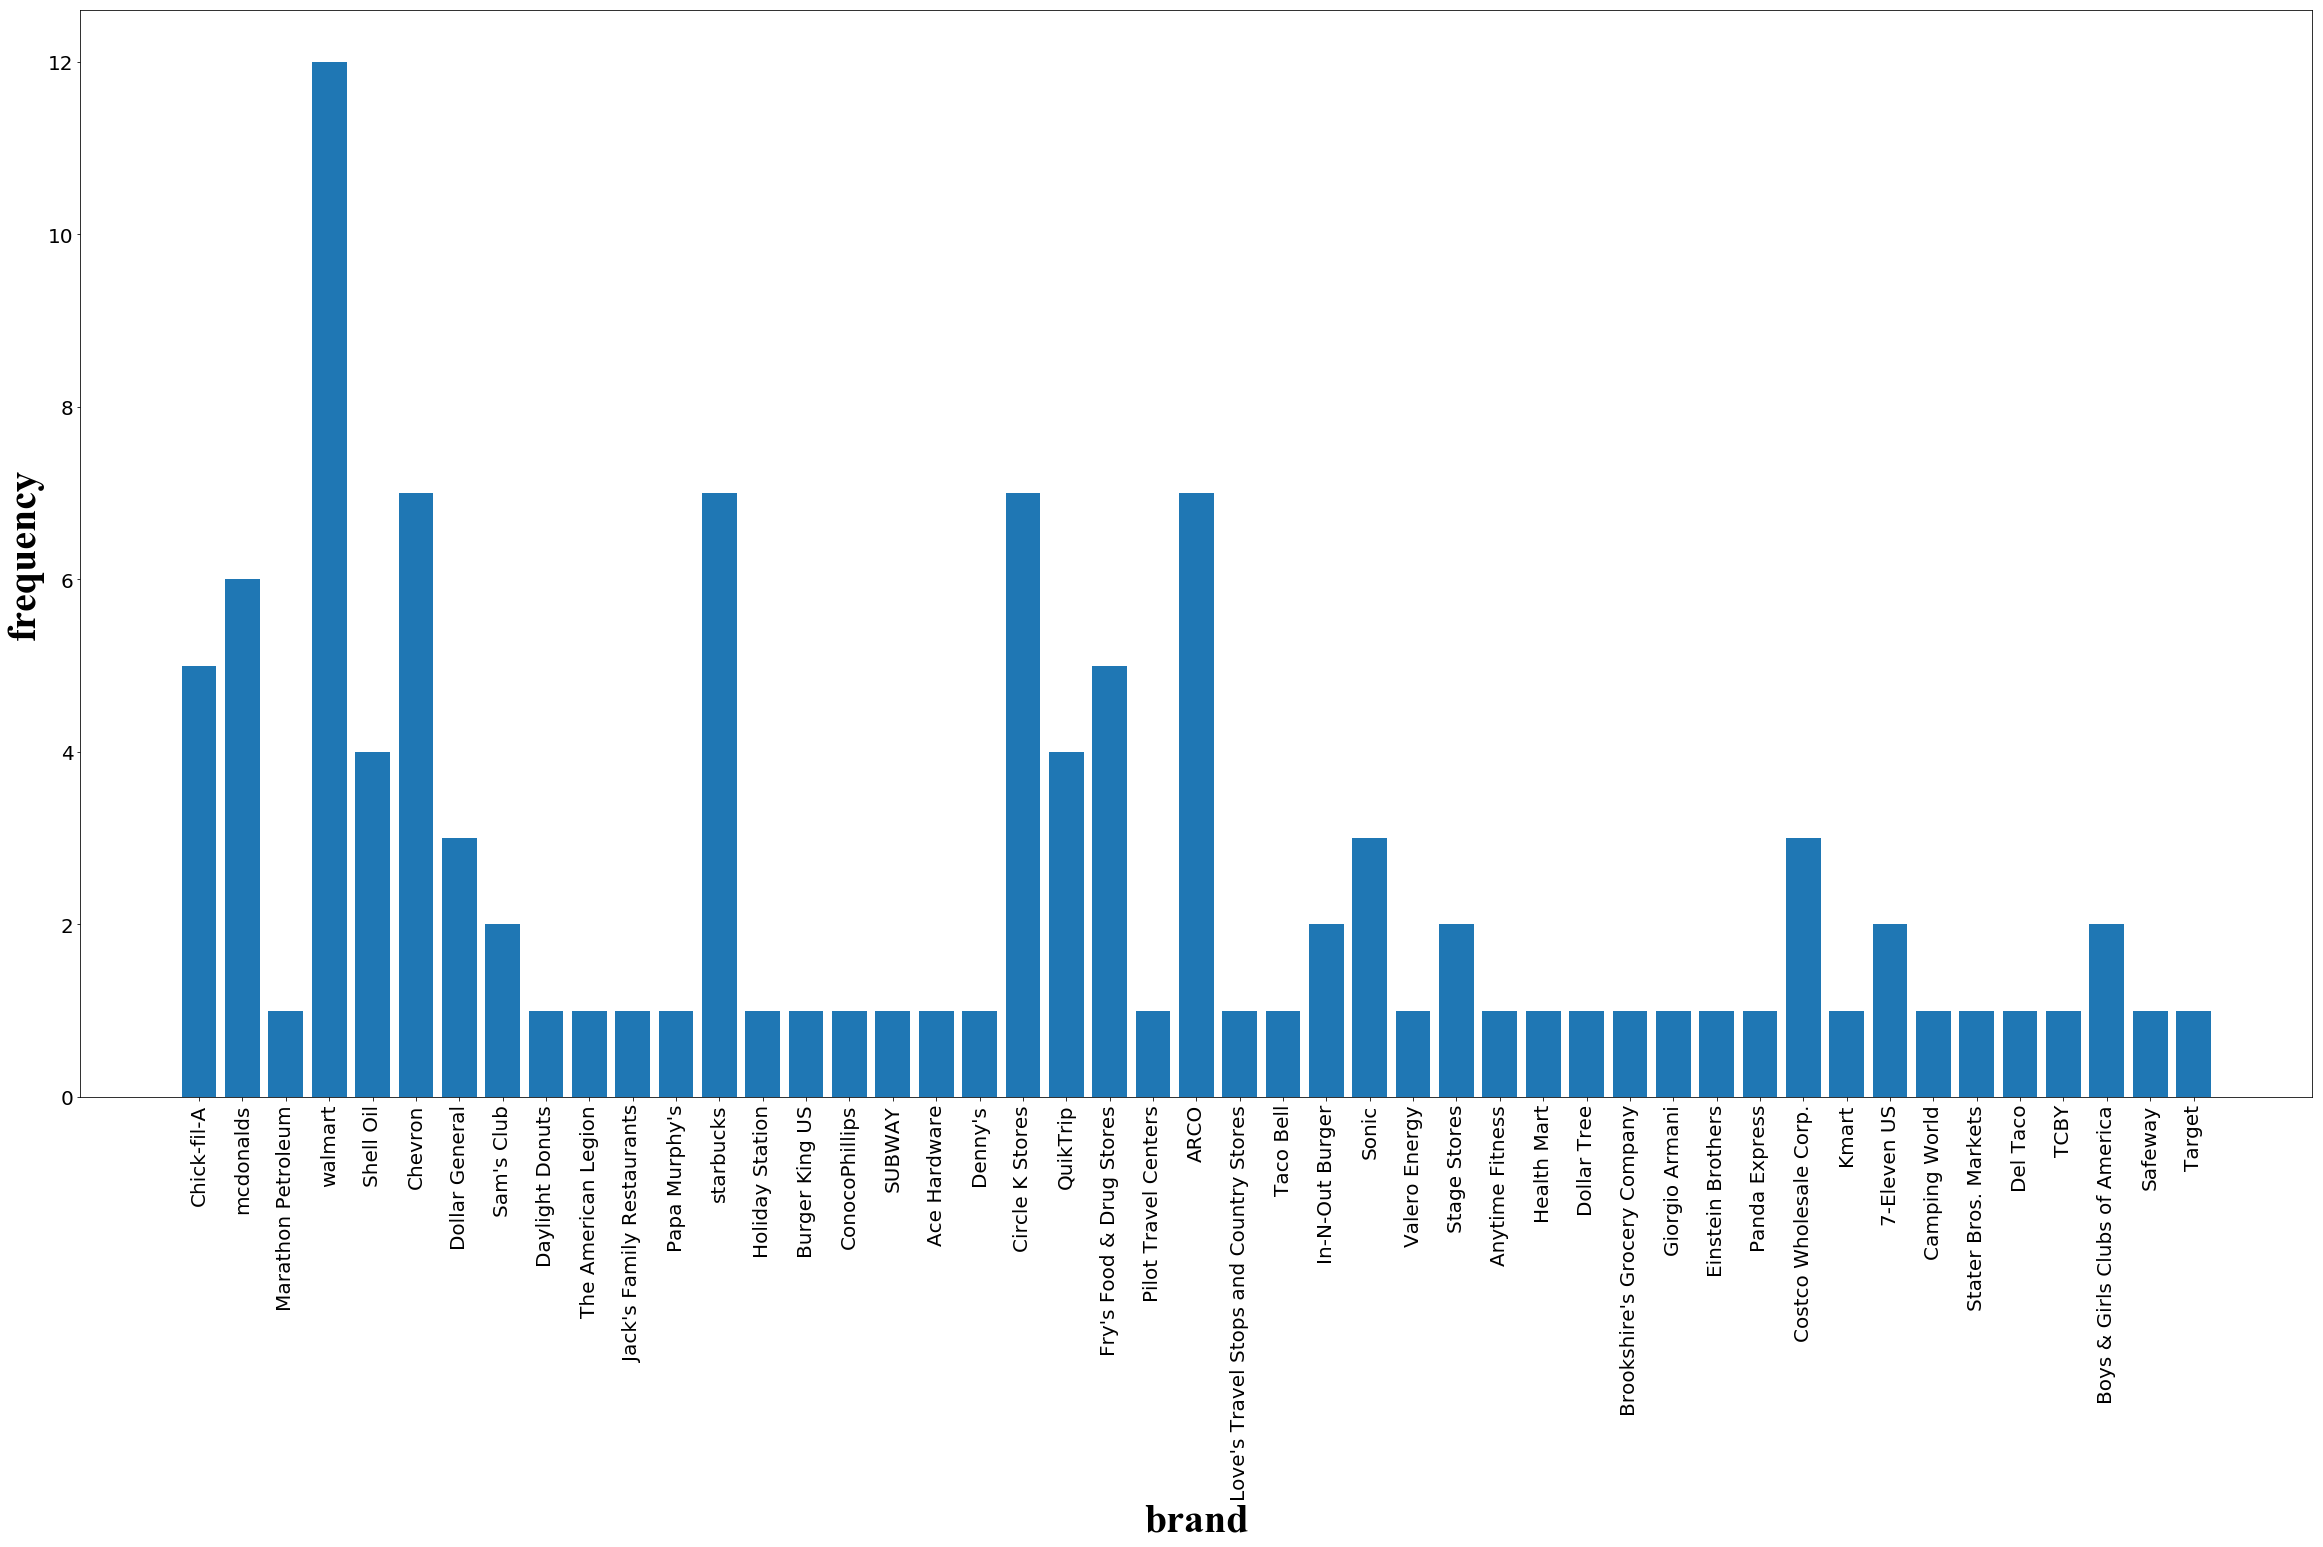

In [171]:
x = dic_day.keys()
y = dic_day.values()
plt.figure(figsize=(40,20))
plt.bar(x,y)
font = {'family':'Times New Roman', 'size':40}
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
plt.xlabel('brand', font)
plt.ylabel('frequency', font)
plt.show()

## 12.3频率最高的二十个商品可视化

In [172]:
dic_day = dict()
for i in range(len(day_l)):
    for j in range(len(day_l[i])):
        dic_day[day_l[i][j]] = dic_day.get(day_l[i][j], 0) + 1

In [175]:
sort_day = sorted(dic_day.items(), key=lambda x:x[1], reverse=True)

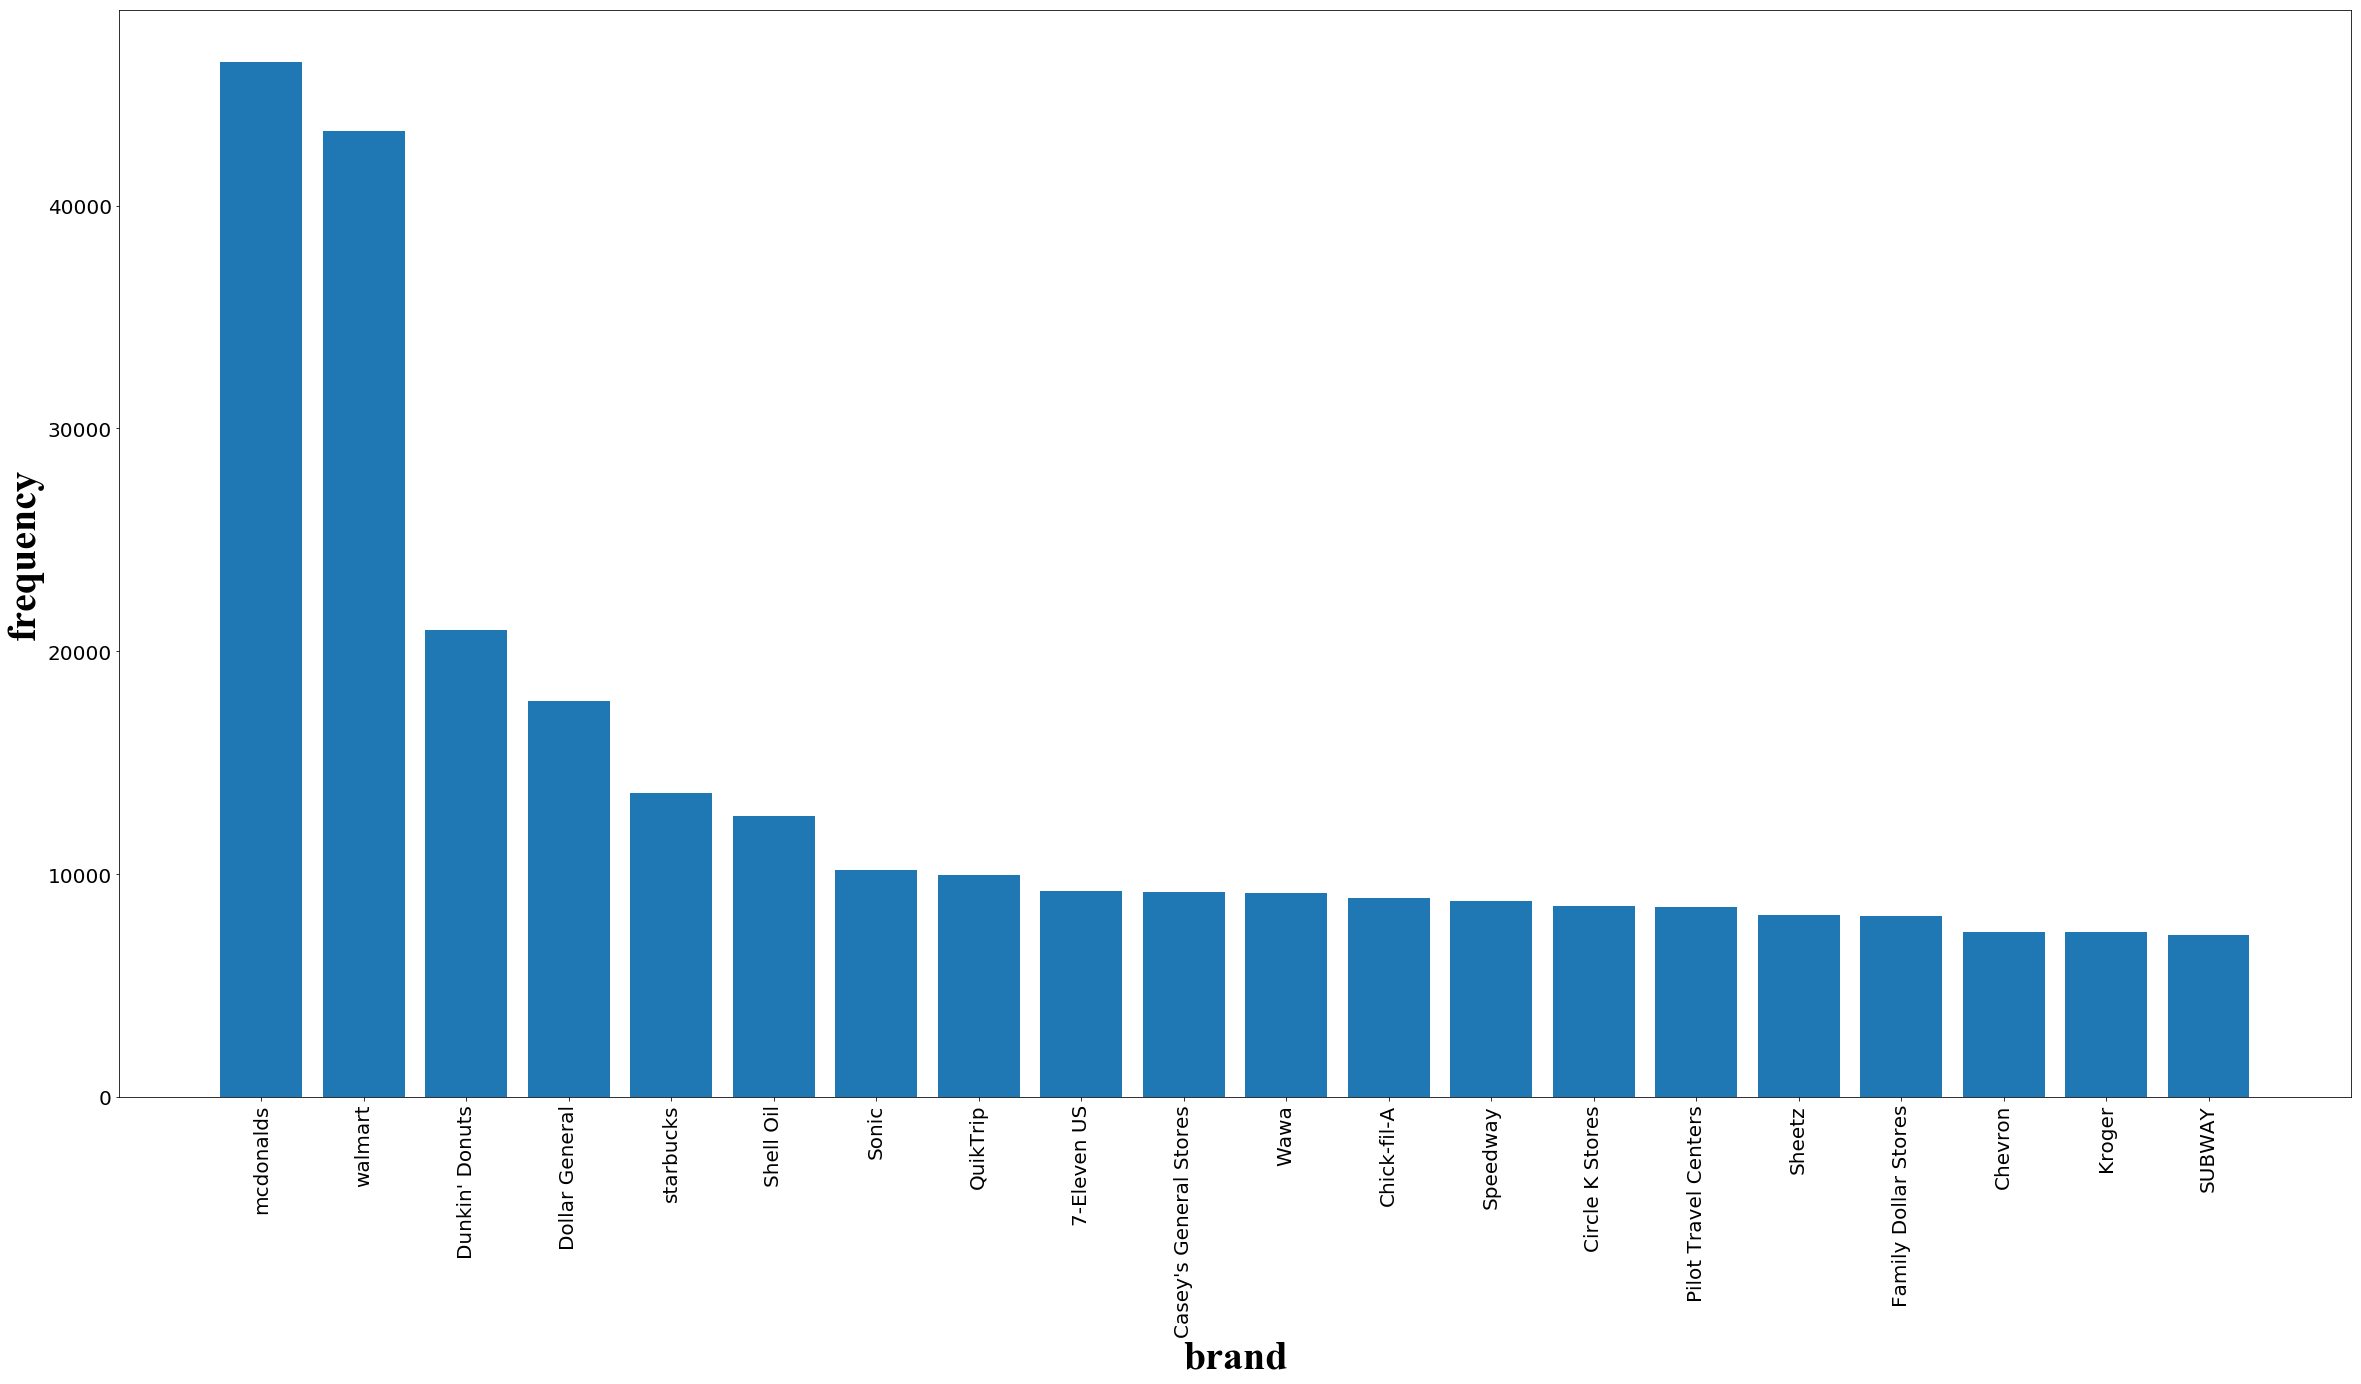

In [194]:
day_top20 = sort_day[:20]
x = []
y = []
for i in range(20):
    x.append(day_top20[i][0])
    y.append(day_top20[i][1])
plt.figure(figsize=(40,20))
plt.bar(x,y)
font = {'family':'Times New Roman', 'size':40}
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
plt.xlabel('brand', font)
plt.ylabel('frequency', font)
plt.show()

## 12.4五数概括

In [ ]:
mini_day = np.percentile(rn_distance, 0)
Q1_distance = np.percentile(rn_distance, 25)
Q2_distance = np.percentile(rn_distance, 50)
Q3_distance = np.percentile(rn_distance, 75)
maxi_distance = np.percentile(rn_distance, 100)
print('最小值：',mini_distance)
print('Q1：',Q1_distance)
print('Q2：',Q2_distance)
print('Q3：',Q3_distance)
print('最大值：',maxi_distance)

# 13.对属性related_same_month_brand进行分析

## 13.1该项属性的每一项记录包含多个，尝试将其合并分析

In [196]:
month_brand = data['related_same_month_brand']

In [197]:
month_l = []
for i in range(len(month_brand)):
    if isinstance(month_brand[i], str):
        month_l.append(ast.literal_eval(month_brand[i]))

## 13.2前50个记录合并可视化

In [198]:
dic_month = dict()
for i in range(50):
    for j in range(len(month_l[i])):
        dic_month[month_l[i][j]] = dic_month.get(month_l[i][j], 0) + 1

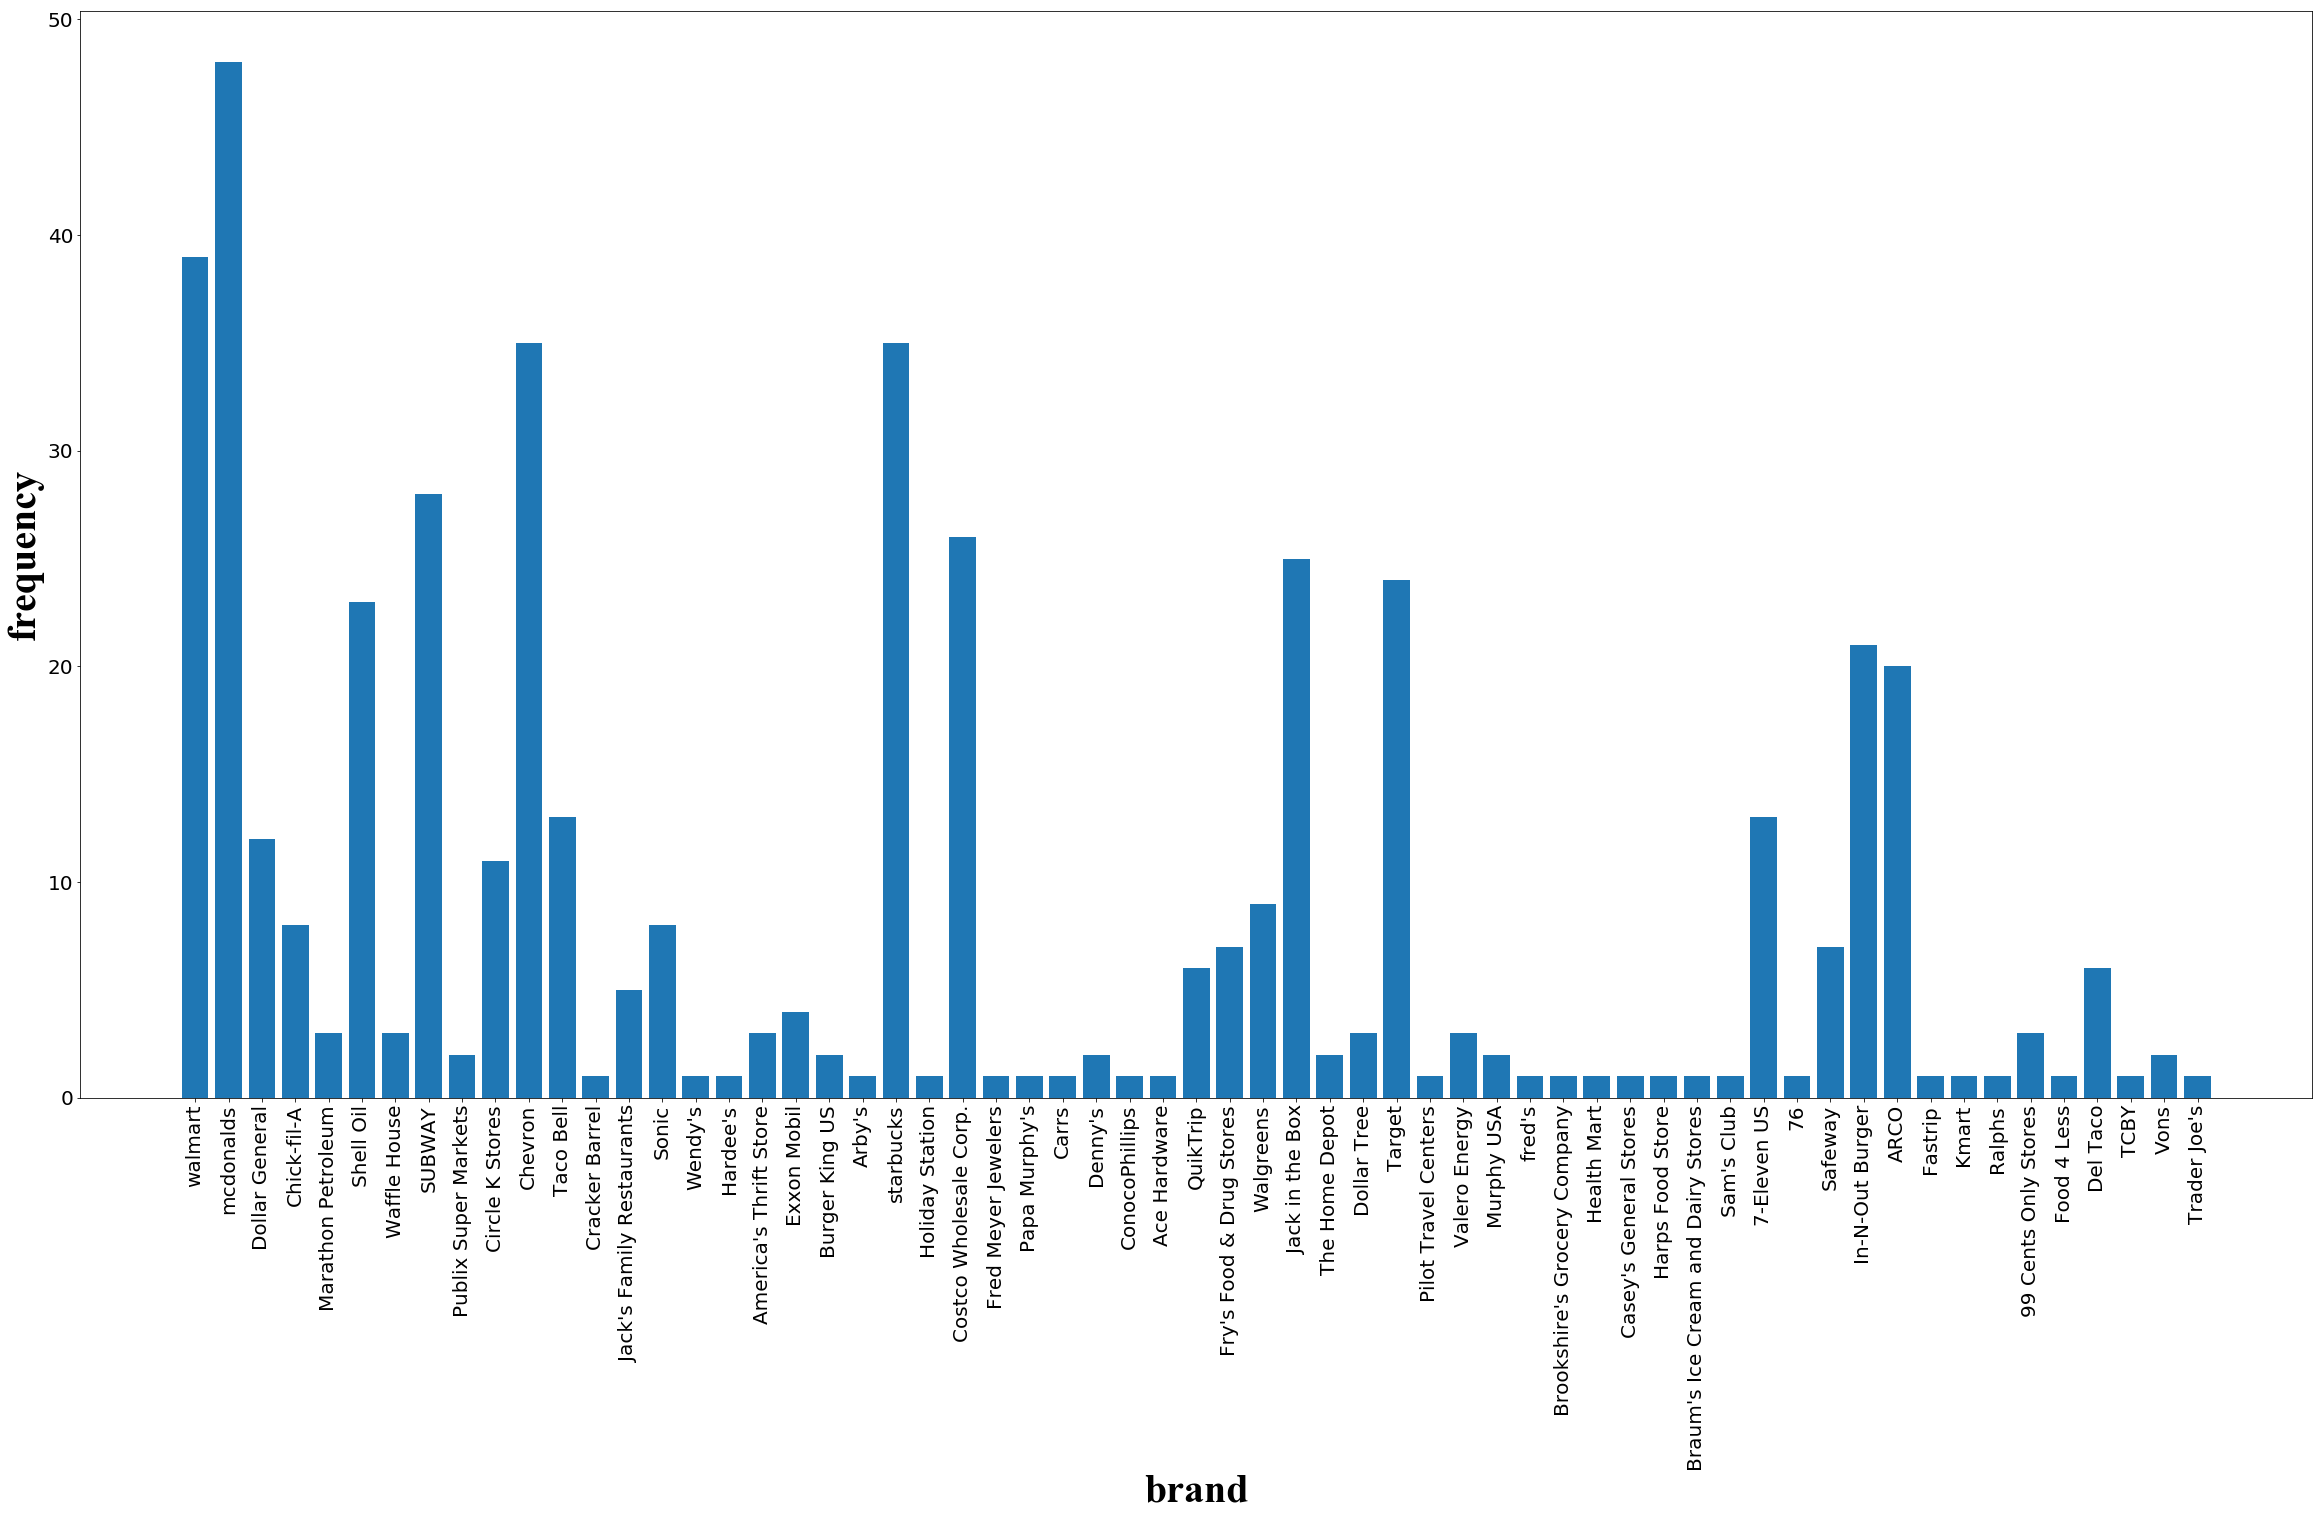

In [199]:
x = dic_month.keys()
y = dic_month.values()
plt.figure(figsize=(40,20))
plt.bar(x,y)
font = {'family':'Times New Roman', 'size':40}
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
plt.xlabel('brand', font)
plt.ylabel('frequency', font)
plt.show()

## 13.3频率最高的二十个商品可视化

In [200]:
dic_month = dict()
for i in range(len(month_l)):
    for j in range(len(month_l[i])):
        dic_month[month_l[i][j]] = dic_month.get(month_l[i][j], 0) + 1

In [201]:
sort_month = sorted(dic_month.items(), key=lambda x:x[1], reverse=True)

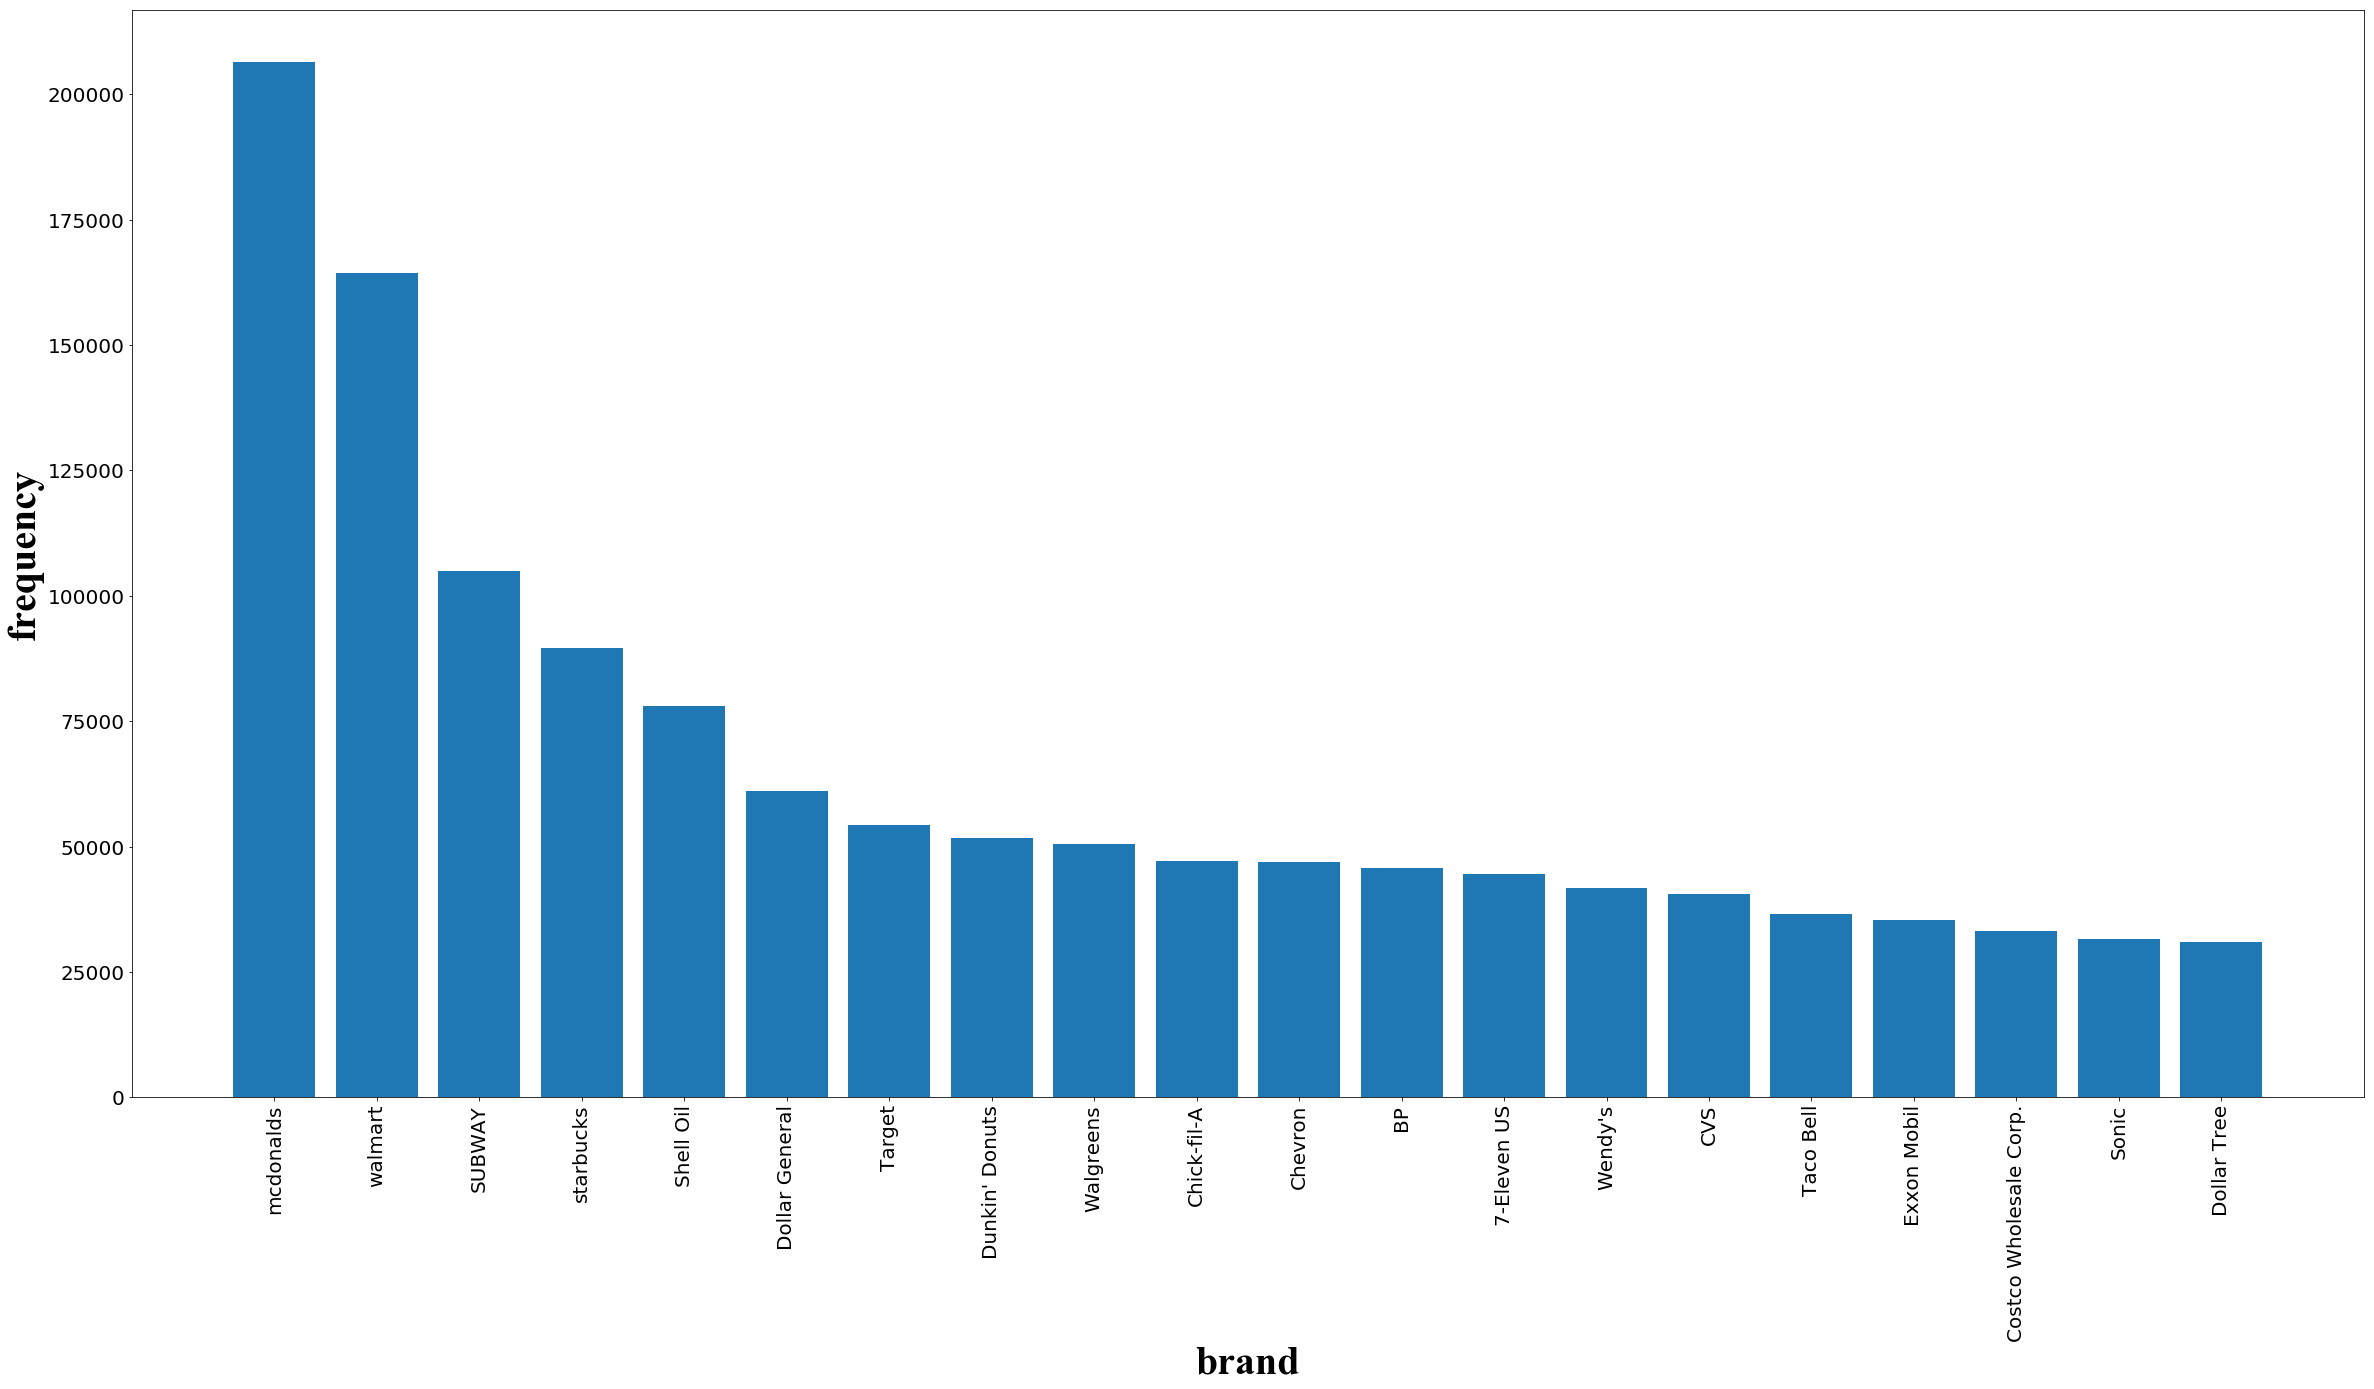

In [204]:
month_top20 = sort_month[:20]
x = []
y = []
for i in range(20):
    x.append(month_top20[i][0])
    y.append(month_top20[i][1])
plt.figure(figsize=(40,20))
plt.bar(x,y)
font = {'family':'Times New Roman', 'size':40}
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
plt.xlabel('brand', font)
plt.ylabel('frequency', font)
plt.show()

# 14.对属性top_brands进行分析

## 14.1该项属性的每一项记录包含多个，尝试将其合并分析

In [210]:
top_brand = data['top_brands']

In [211]:
top_l = []
for i in range(len(top_brand)):
    if isinstance(top_brand[i], str):
        top_l.append(ast.literal_eval(top_brand[i]))

## 14.2前50个记录合并的图形进行可视化

In [213]:
dic_top = dict()
for i in range(50):
    for j in range(len(top_l[i])):
        dic_top[top_l[i][j]] = dic_top.get(top_l[i][j], 0) + 1

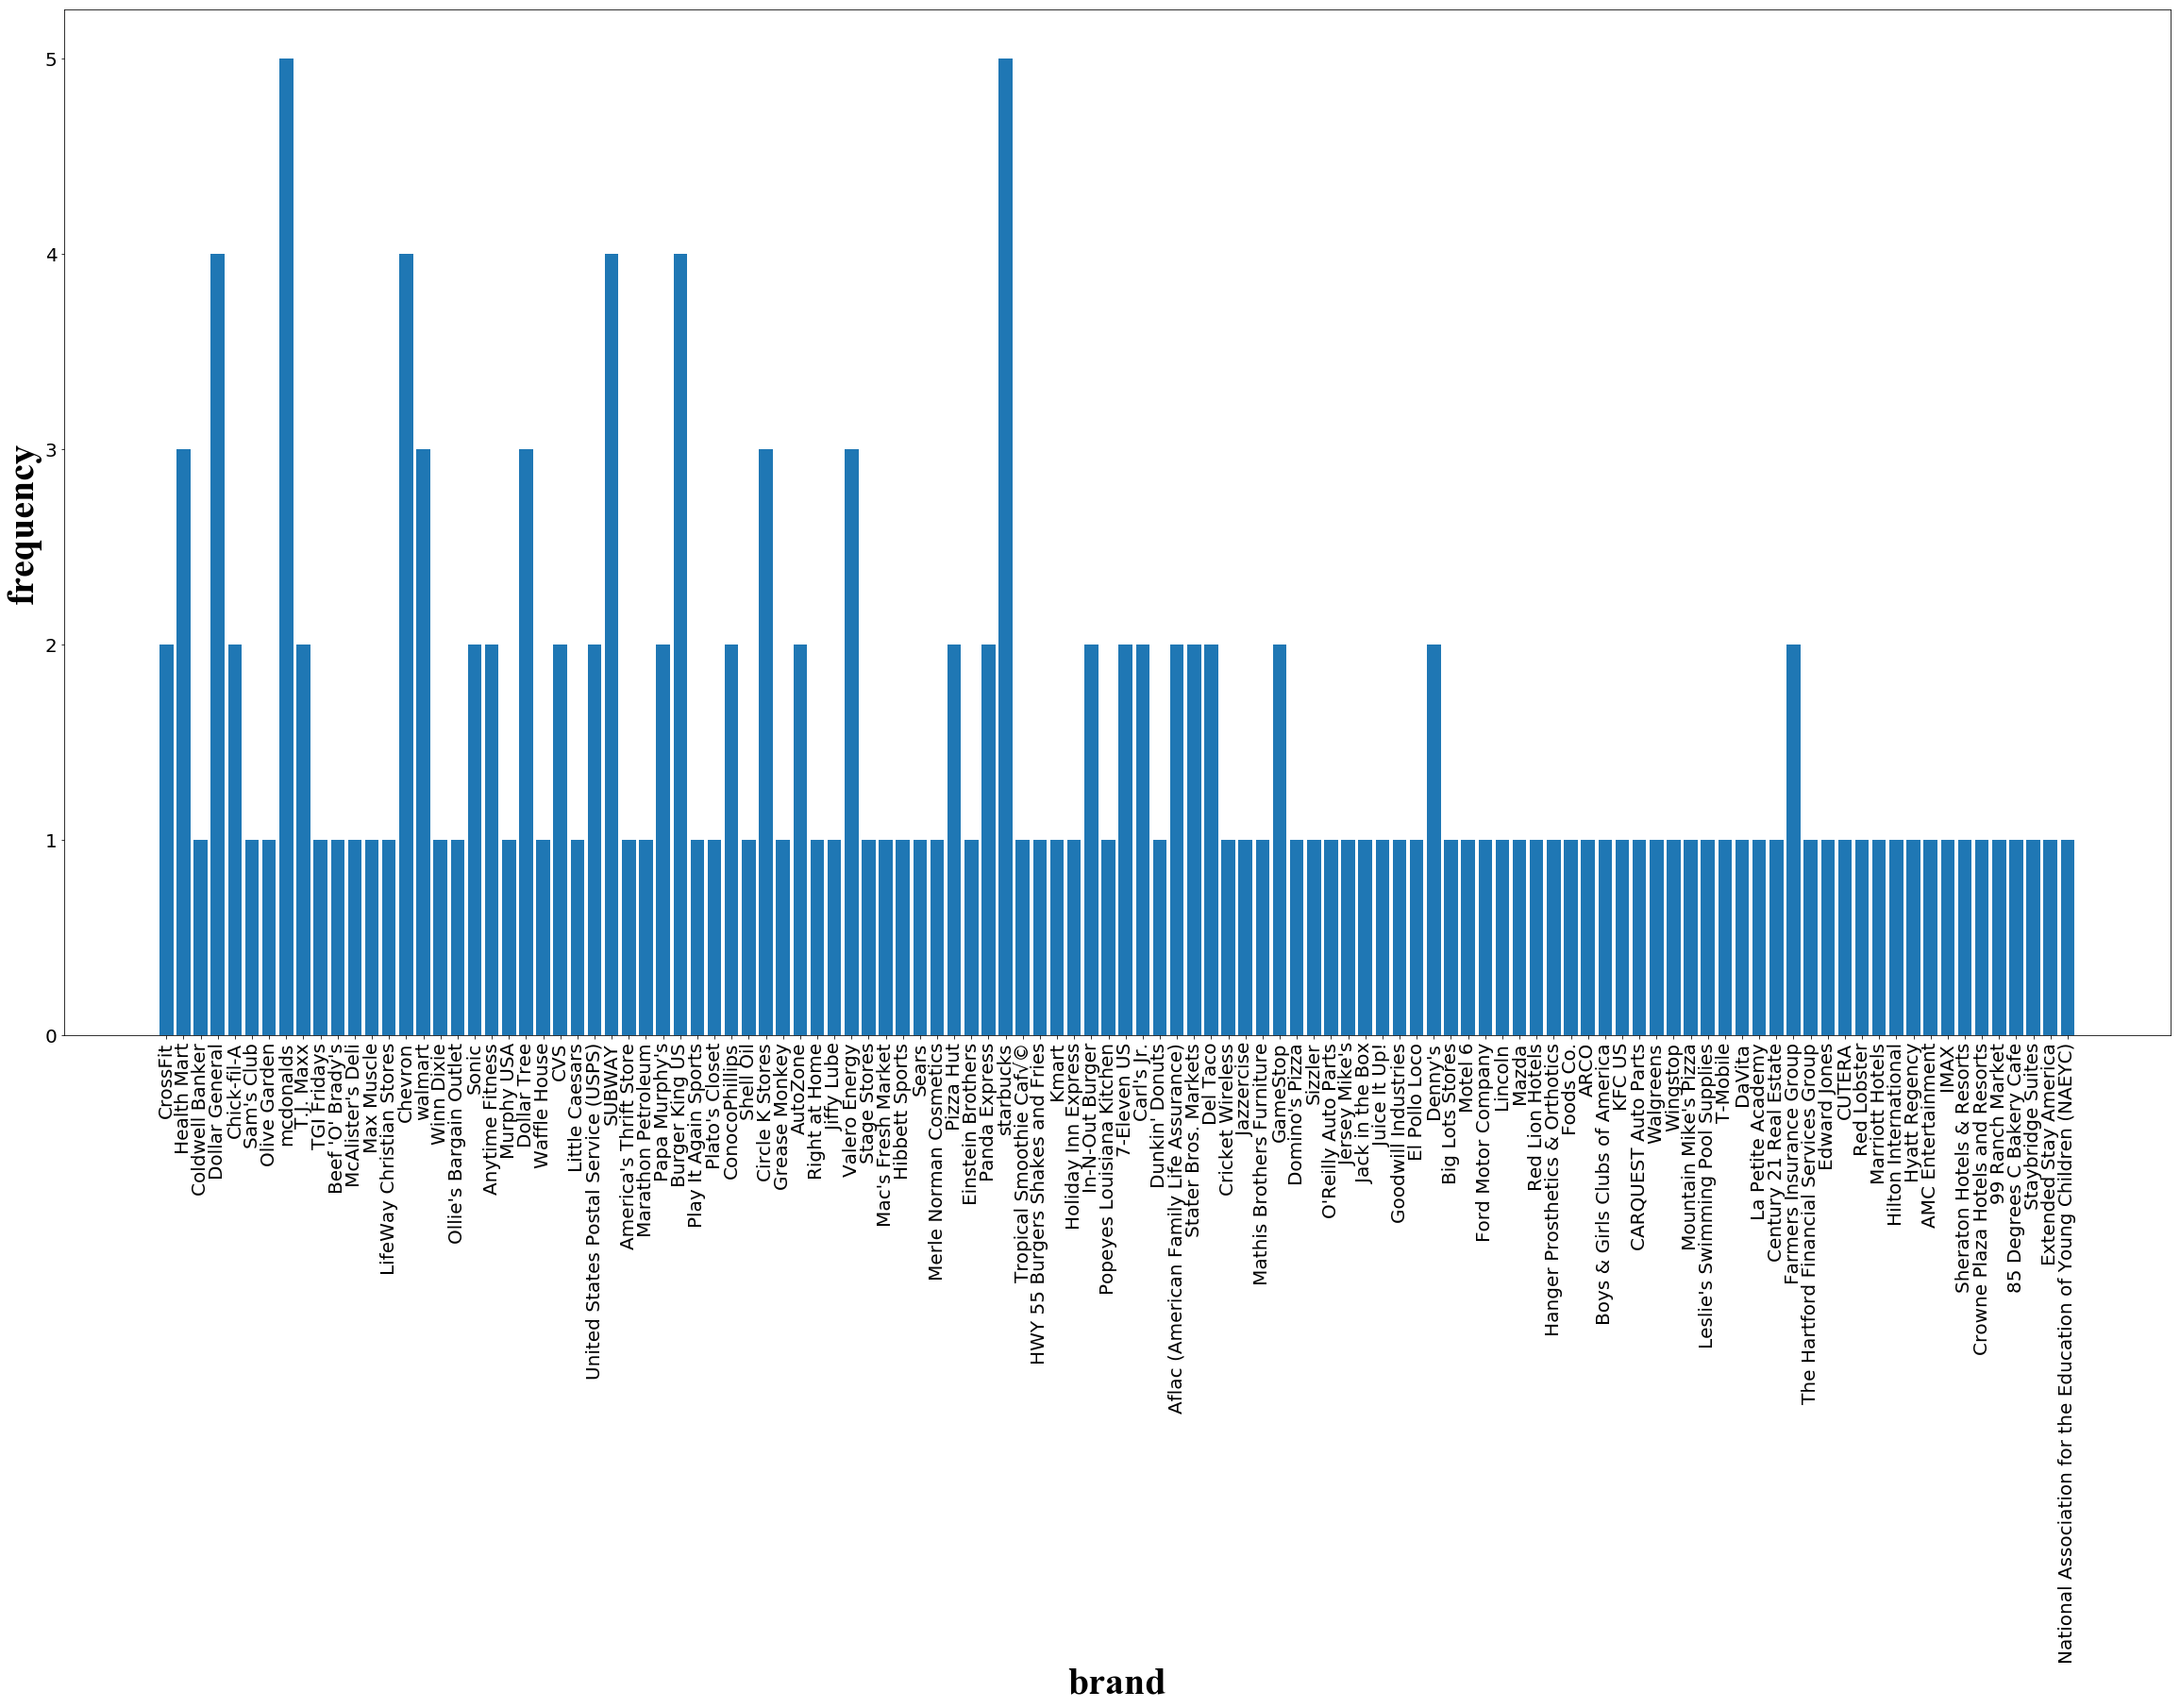

In [214]:
x = dic_top.keys()
y = dic_top.values()
plt.figure(figsize=(40,20))
plt.bar(x,y)
font = {'family':'Times New Roman', 'size':40}
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
plt.xlabel('brand', font)
plt.ylabel('frequency', font)
plt.show()

## 14.3频率最高的二十个可视化

In [216]:
dic_top = dict()
for i in range(len(top_l)):
    for j in range(len(top_l[i])):
        dic_top[top_l[i][j]] = dic_top.get(top_l[i][j], 0) + 1

In [218]:
sort_top = sorted(dic_top.items(), key=lambda x:x[1], reverse=True)

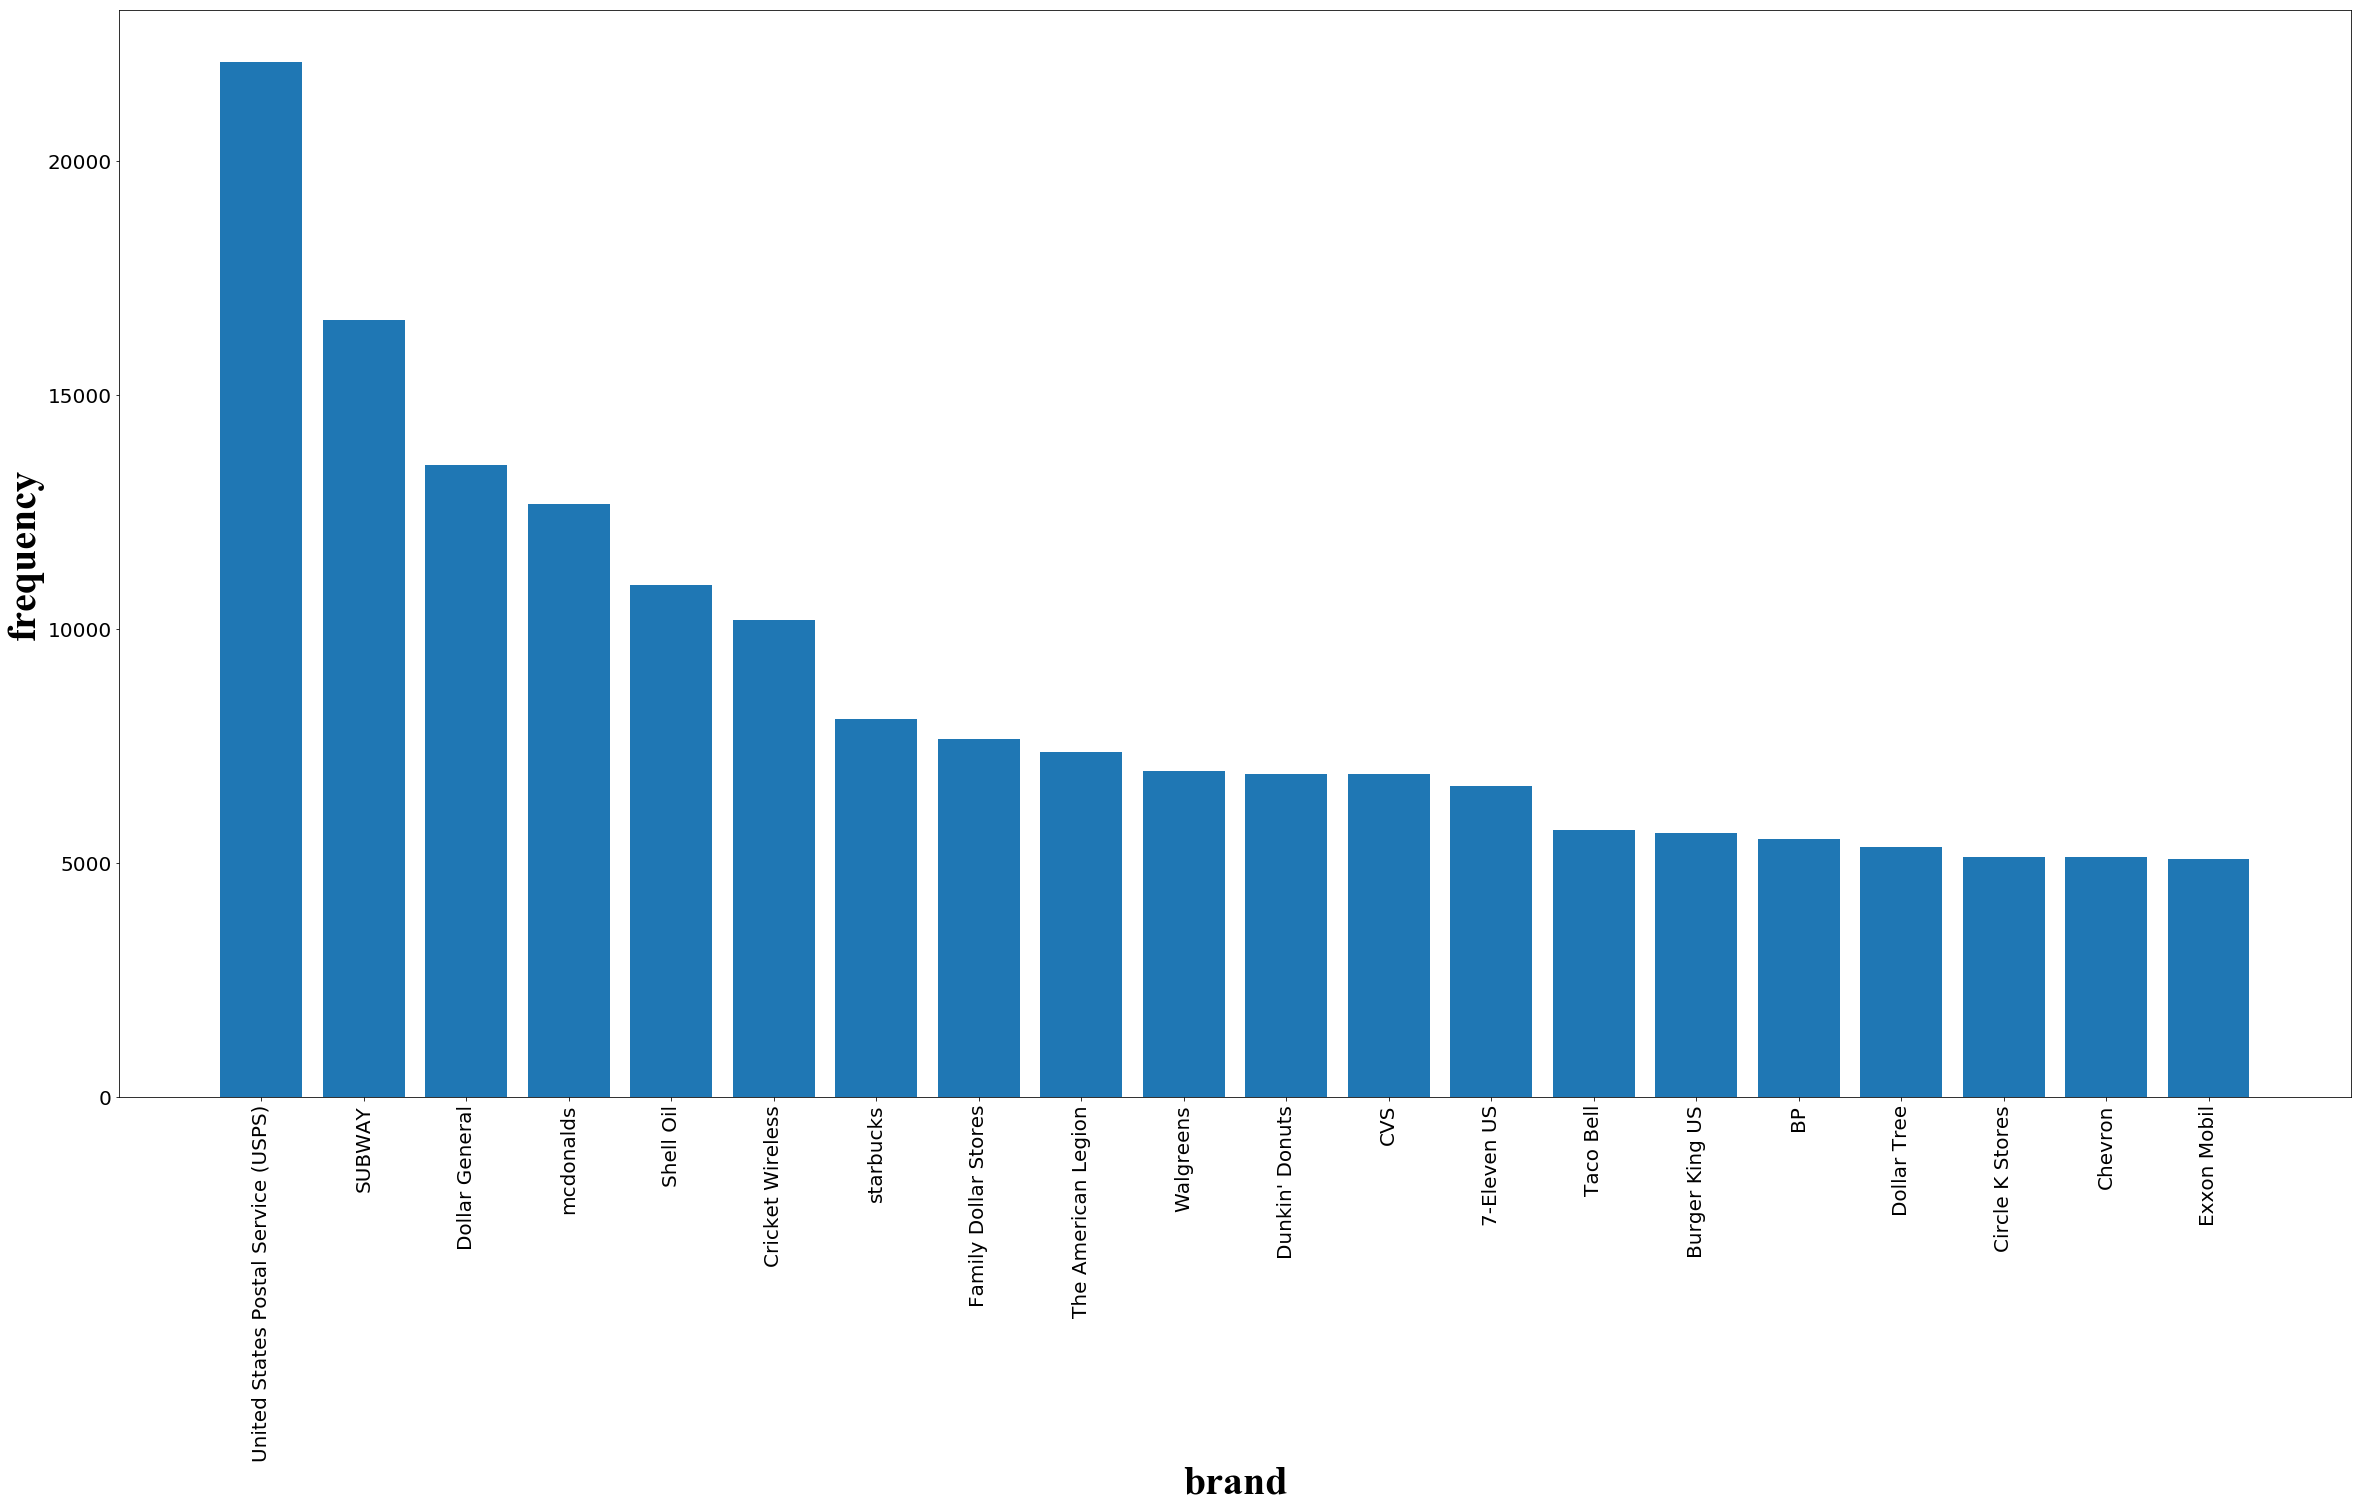

In [219]:
top_top20 = sort_top[:20]
x = []
y = []
for i in range(20):
    x.append(top_top20[i][0])
    y.append(top_top20[i][1])
plt.figure(figsize=(40,20))
plt.bar(x,y)
font = {'family':'Times New Roman', 'size':40}
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
plt.xlabel('brand', font)
plt.ylabel('frequency', font)
plt.show()

# 15.对属性popularity_by_hour进行分析

## 15.1该项属性的每一项记录包含多个，将其合并分析

In [221]:
pophour = data['popularity_by_hour']

In [222]:
pophour_l = []
for i in range(len(pophour)):
    if isinstance(pophour[i], str):
        pophour_l.append(ast.literal_eval(pophour[i]))

In [224]:
dic_pophour = dict()
for i in range(len(pophour_l)):
    for j in range(len(pophour_l[i])):
        dic_pophour[pophour_l[i][j]] = dic_pophour.get(pophour_l[i][j], 0) + 1

In [227]:
sort_pophour = sorted(dic_pophour.items(), key=lambda x:x[1], reverse=True)

## 15.2频率最高的二十个可视化

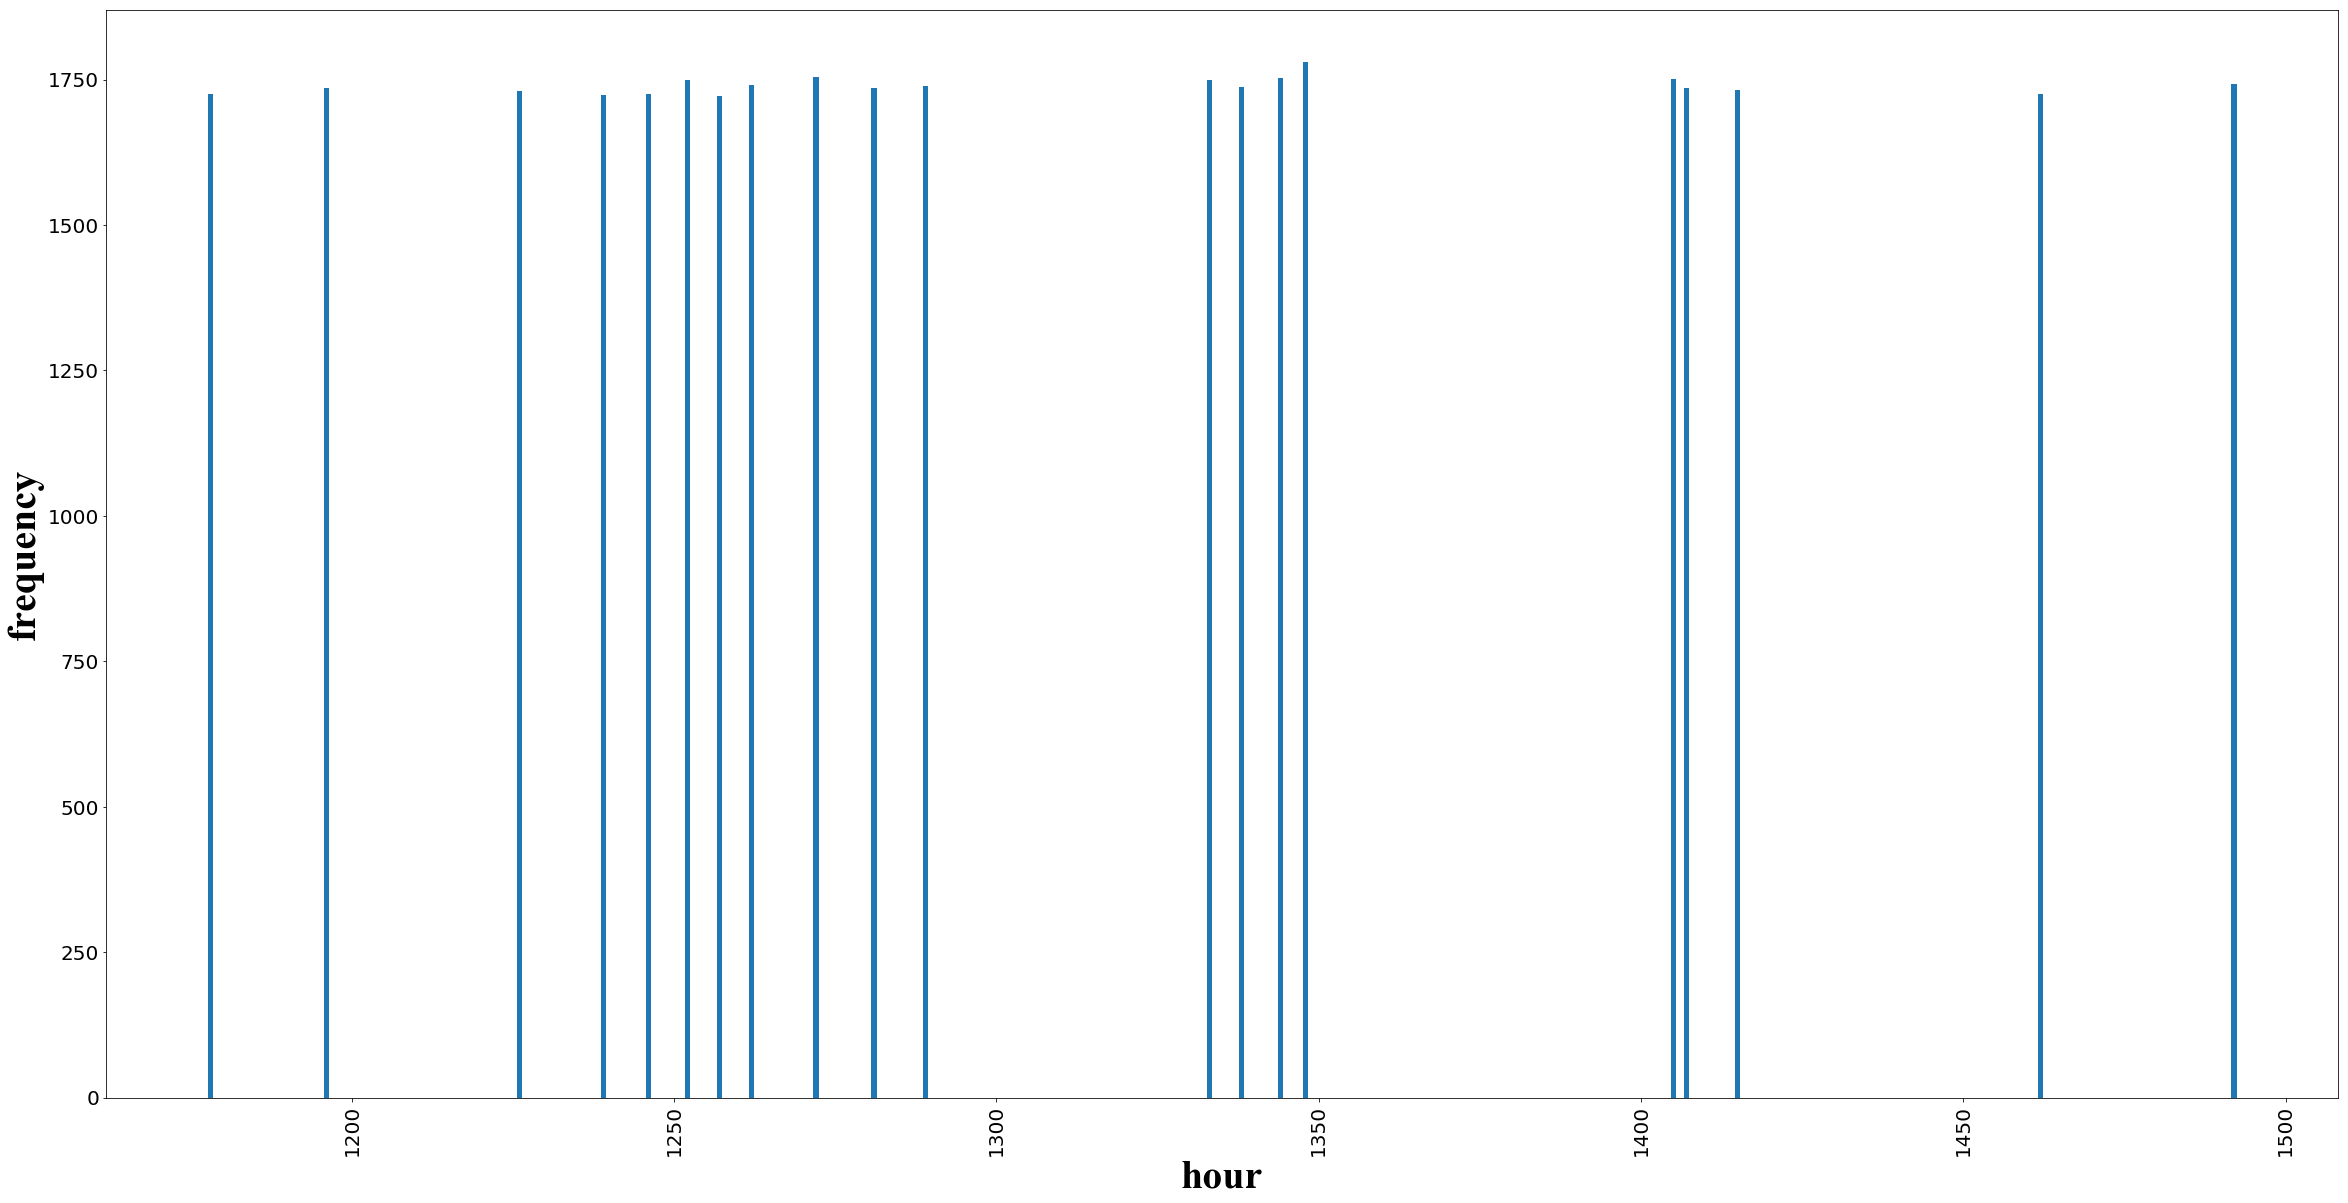

In [265]:
pophour_top20 = sort_pophour[:20]
x = []
y = []
for i in range(20):
    x.append(pophour_top20[i][0])
    y.append(pophour_top20[i][1])
plt.figure(figsize=(40,20))
plt.bar(x,y)
font = {'family':'Times New Roman', 'size':40}
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
plt.xlabel('hour', font)
plt.ylabel('frequency', font)
plt.show()

## 15.3五数概括

In [237]:
hour_index = []
for item in dic_pophour:
    hour_index.append(item)
mini_pophour = np.percentile(hour_index, 0)
Q1_pophour = np.percentile(hour_index, 25)
Q2_pophour = np.percentile(hour_index, 50)
Q3_pophour = np.percentile(hour_index, 75)
maxi_pophour = np.percentile(hour_index, 100)
print('最小值：',mini_pophour)
print('Q1：',Q1_pophour)
print('Q2：',Q2_pophour)
print('Q3：',Q3_pophour)
print('最大值：',maxi_pophour)

最小值： 0.0
Q1： 10378.25
Q2： 20758.5
Q3： 32257.75
最大值： 477597.0


In [238]:
IQR_pophour = Q3_pophour - Q1_pophour
ob_mini_pophour = Q1_pophour - 1.5*IQR_pophour
ob_maxi_pophour = Q3_pophour + 1.5*IQR_pophour

In [239]:
lower_outlier_pophour = 0
upper_outlier_pophour = 0
for num in hour_index:
    if num < ob_mini_pophour:
        lower_outlier_pophour += 1
    elif num > ob_maxi_pophour:
        upper_outlier_pophour += 1
print('下离群点个数： ', lower_outlier_pophour)
print('上离群点个数： ', upper_outlier_pophour)

下离群点个数：  0
上离群点个数：  1778


# 16.对属性pupularity_by_day进行分析

## 16.1该项属性的每一项记录包含多个，将其合并分析

In [251]:
popday = data['popularity_by_day']

In [252]:
dic_popday = {}
for i in range(5):
    if isinstance(workcbgs[i], str):
        dic_popday = Counter(dic_popday) + Counter(ast.literal_eval(popday[i]))
dic_work = dict(dic_work)

In [264]:
dic_popday

Counter({'Monday': 55982,
         'Tuesday': 57105,
         'Wednesday': 51629,
         'Thursday': 46576,
         'Friday': 56540,
         'Saturday': 52213,
         'Sunday': 44357})

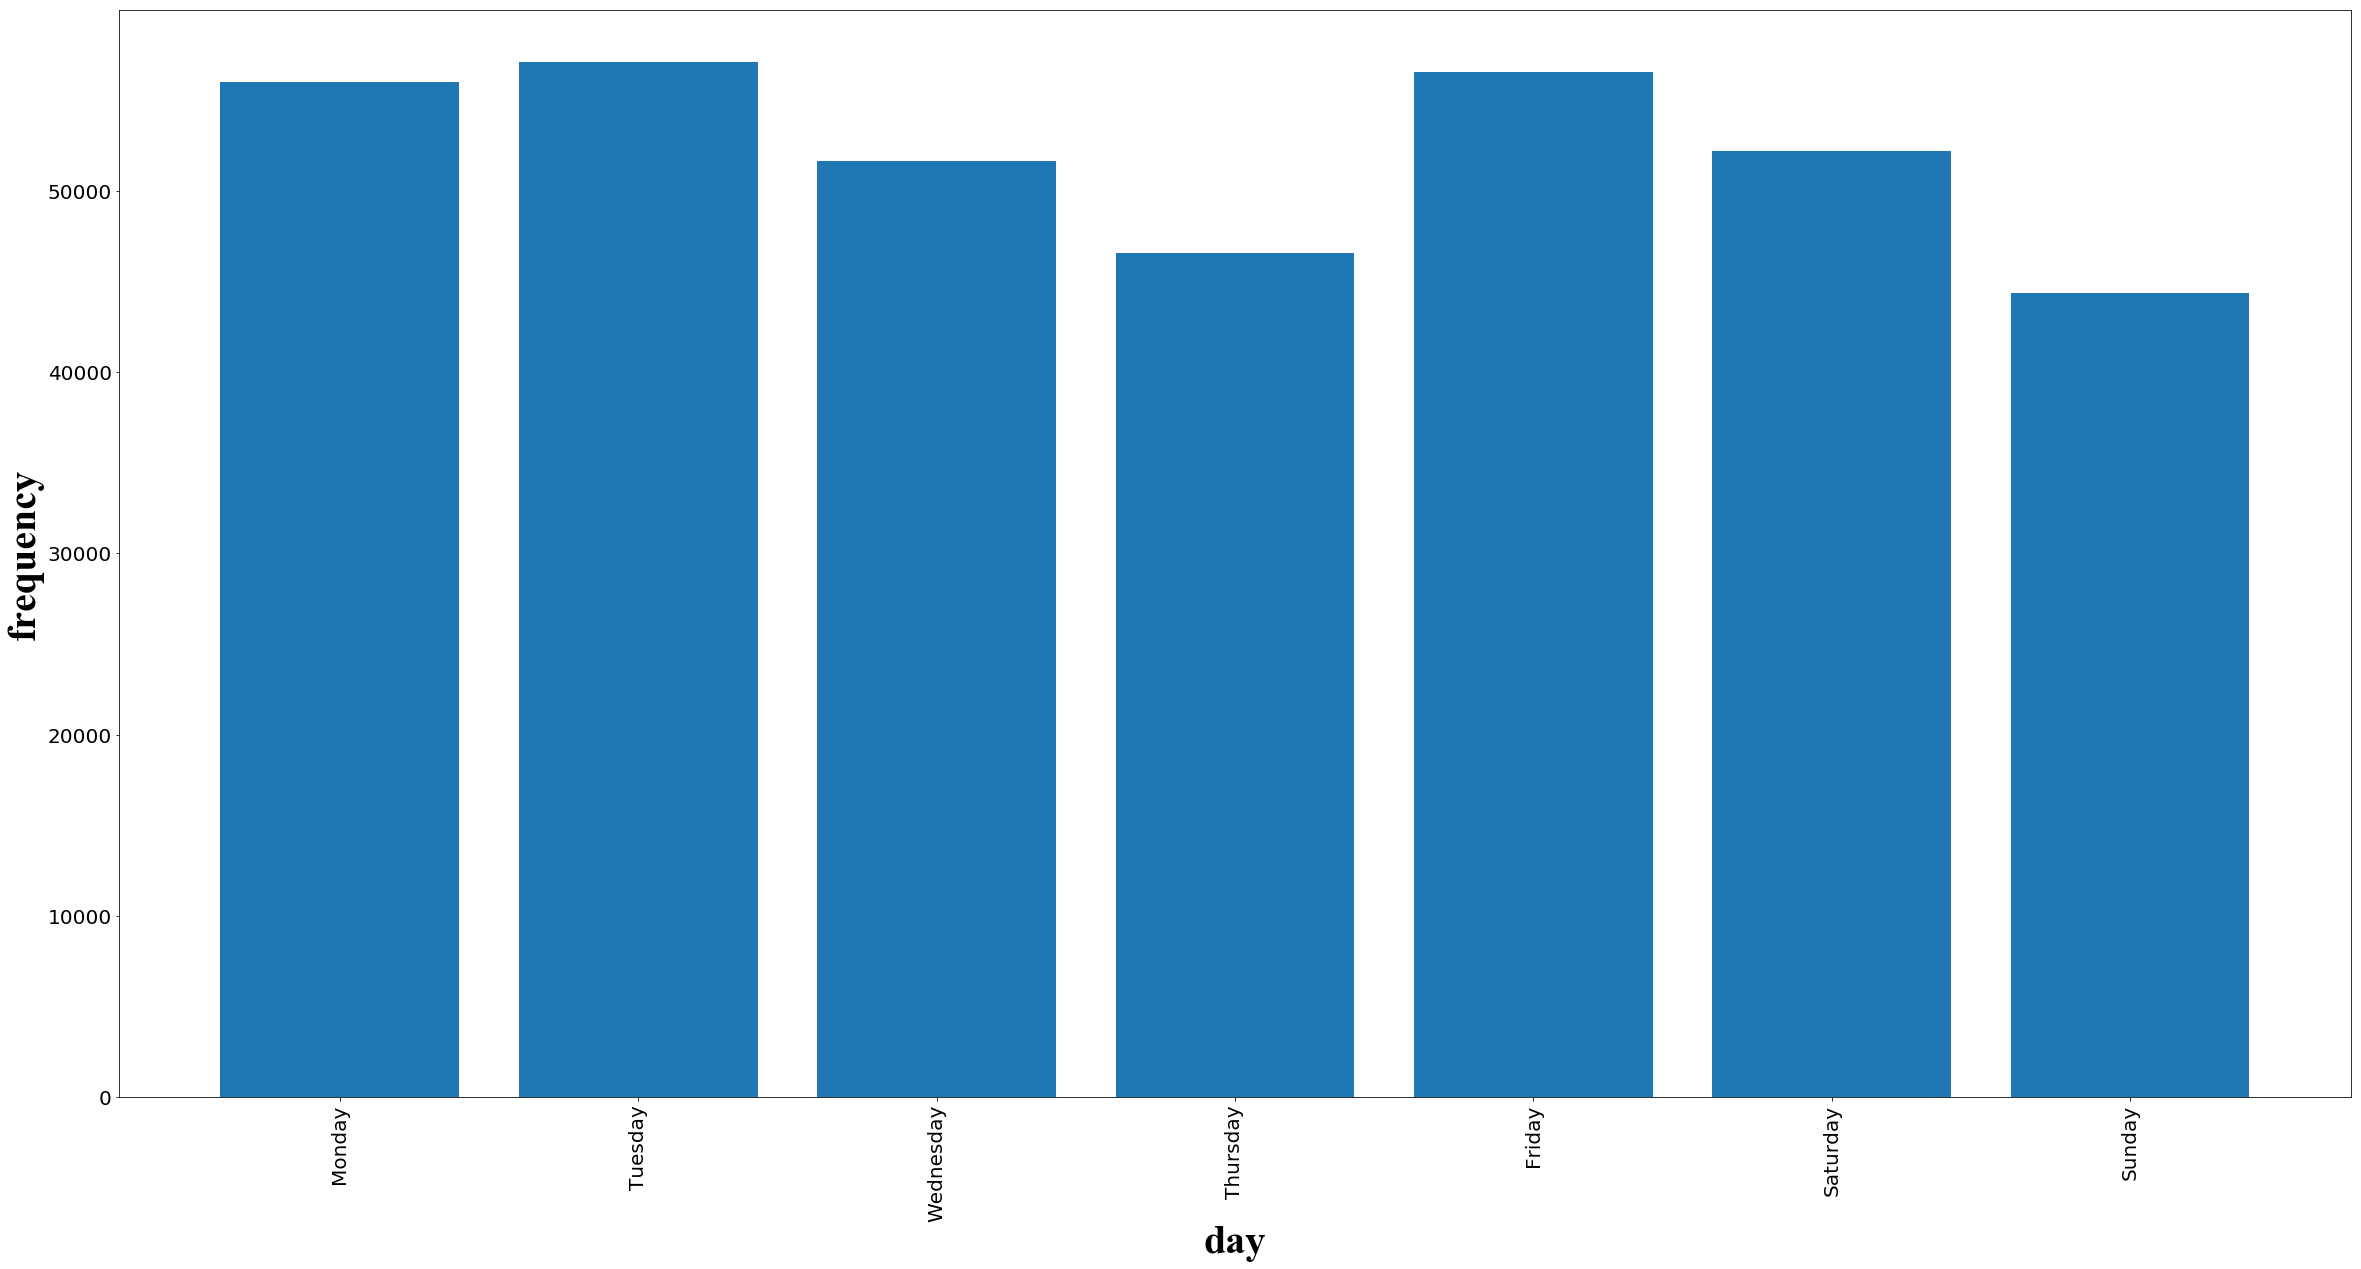

In [268]:
x = dic_popday.keys()
y = dic_popday.values()
plt.figure(figsize=(40,20))
plt.bar(x,y)
font = {'family':'Times New Roman', 'size':40}
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
plt.xlabel('day', font)
plt.ylabel('frequency', font)
plt.show()

## 16.2五数概括

In [272]:
popday_fre = []
for i in dic_popday.values():
    popday_fre.append(i)
mini_popday = np.percentile(popday_fre, 0)
Q1_popday = np.percentile(popday_fre, 25)
Q2_popday = np.percentile(popday_fre, 50)
Q3_popday = np.percentile(popday_fre, 75)
maxi_popday = np.percentile(popday_fre, 100)
print('最小值：',mini_popday)
print('Q1：',Q1_popday)
print('Q2：',Q2_popday)
print('Q3：',Q3_popday)
print('最大值：',maxi_popday)

最小值： 44357.0
Q1： 49102.5
Q2： 52213.0
Q3： 56261.0
最大值： 57105.0


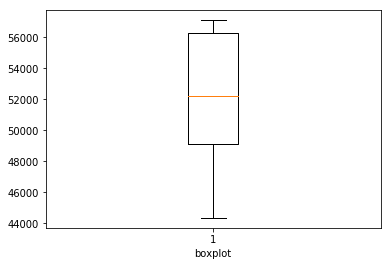

In [277]:
plt.boxplot(popday_fre)
plt.xlabel('boxplot')
plt.show()